## COMPONENT ONE: Sales Performance of Video Games (40 points)
- Required Dataset: Video games sales dataset
- Dataset Link:
- https://www.kaggle.com/datasets/ibriiee/video-games-sales-dataset-2022-updated-extra-feat

- Goal
- Your goal for this exercise is to explore how supervised learning models can be used to predict
the sales performance of video games worldwide, based on the information contained in this
dataset. You will also study how unsupervised learning techniques can be used to identify
clustering patterns in this dataset.
You will write up the results of your analysis in the style of a scientific report. Your report
should address the following questions:
- a. Compare regression models that predict the “global sales” of video games based on a
single numerical input feature. Based on your results, which numerical variable in the
dataset is the best predictor for “global sales” of video games and why? For each
numerical input feature, is the global sales better fit by a linear model or by a non-
linear (e.g. polynomial) model?
- b. Consider regression models that take multiple numerical variables as input features
to predict the “global sales” of video games. Does the inclusion of multiple input
features improve the accuracy of the model’s prediction compared to the single-input
feature models that you explored in part (a)?
- c. In parts (a) and (b), you only considered models that use the numerical variables from
the dataset as inputs. However, there are also several categorical variables in the
dataset that are likely to affect the global sales of video games. Now train a regression
model that uses all relevant input variables (both categorical and numerical) to predict
the global sales of video games (e.g. a Random Forest Regressor model). Does this
improve the accuracy of your results?
- d. Develop an Artificial Neural Network (ANN) model to predict the global sales of video
games based on all the available information from the dataset. How does its
performance compare to the other supervised learning models that you have
considered? Discuss your choices for the architecture of the neural network that you
used, and describe how you tuned the hyperparameters in your model to achieve the
best performance.
- e. Based on the results of your analysis, what is the best model for predicting the global
sales of video games and why? You should use suitable figures and evaluation metrics
to support your conclusions.
- f. Use the k-Means clustering algorithm to identify clusters in the video games’ sales
data. Consider different combinations of the numerical variables in the dataset to use
as input features for the clustering algorithm. In each case, what is the optimal number
of clusters (k) to use and why? Which combination of variables produces the best
clustering results? Use appropriate evaluation metrics to support your conclusions.
- g. Compare the results of the k-Means clustering model from part (f) to at least one other
clustering algorithm. Which algorithm produces the best clustering? Use suitable
evaluation metrics to justify your answer

## Importing necessary Python libraries and packages

In [73]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.losses import mean_squared_error
from keras.metrics import mean_squared_error
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import davies_bouldin_score, silhouette_score

## Load the Dataset from Kaggle

In [74]:
# load the dataset into pandas
df = pd.read_csv(r'C:\Users\hp\Downloads\Video_Games.csv')

In [75]:
# examine the first five rowsusing head() method
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
# examine the shape of the dataframe 
df.shape

(16719, 16)

In [77]:
# column names 
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [78]:
# check for 20 samples of the dataframe 
df.sample(20)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
6148,Rocket Power: Beach Bandits,GBA,2002.0,Platform,THQ,0.20,0.07,0.00,0.01,0.28,NaN,NaN,NaN,NaN,NaN,NaN
12200,Resident Evil 5,PC,2009.0,Action,Capcom,0.01,0.04,0.00,0.01,0.07,86.0,30.0,7.1,597.0,Capcom,M
10533,America's Next Top Model,DS,2008.0,Action,Eidos Interactive,0.10,0.00,0.00,0.01,0.10,NaN,NaN,tbd,NaN,Arts Software,E10+
10647,Tom Clancy's Ghost Recon: Predator,PSP,2010.0,Shooter,Ubisoft,0.07,0.02,0.00,0.02,0.10,54.0,15.0,tbd,NaN,Virtuos,T
15241,Frontlines: Fuel of War,PC,2008.0,Shooter,THQ,0.00,0.02,0.00,0.00,0.02,73.0,19.0,6.9,171.0,Kaos Studios,T
4053,One Piece: Grand Battle!,PS,2001.0,Fighting,Atari,0.00,0.00,0.46,0.03,0.49,NaN,NaN,NaN,NaN,NaN,NaN
1254,SoulCalibur II,GC,2003.0,Fighting,Namco Bandai Games,0.99,0.32,0.11,0.08,1.50,93.0,45.0,9.1,135.0,Namco,T
10718,Nancy Drew: The Model Mysteries,DS,2010.0,Puzzle,THQ,0.09,0.00,0.00,0.01,0.10,NaN,NaN,tbd,NaN,"THQ, AWE Games",E10+
14804,Kisuato,PSV,2015.0,Adventure,TGL,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN
10708,Steins;Gate,PSV,2013.0,Adventure,PQube,0.04,0.04,0.00,0.02,0.10,83.0,16.0,9.2,87.0,5pb,M


## Data Cleaning 
- I will examine the number of missing values
-  I will check for duplicates rows
- I will check the data individual columns for uncleaness
- I will drop columns that will not be used in the buidling the models for prediction.
- I will drop all na values if they are to large for imputation

In [79]:
# checking for duplicates
df.duplicated().sum()

0

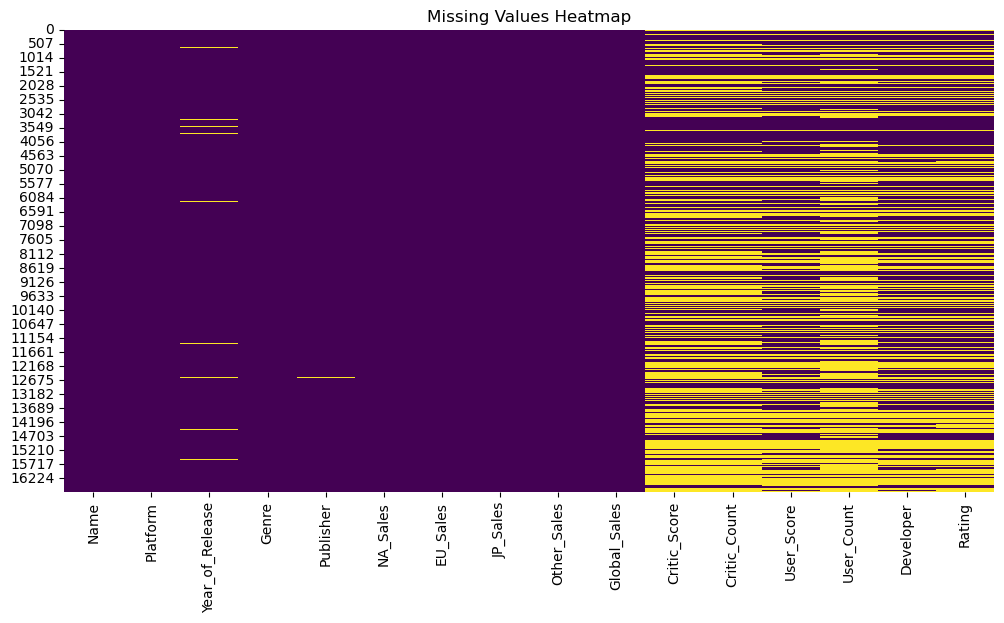

In [80]:
# Heatmap of missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [81]:
# examine the sum of missing values per column
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [82]:
# Calculate the percentage of missing values for each column
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({
    'column_name': df.columns,
    'percent_missing': percent_missing.round(2).astype(str) + '%'
})

print(missing_value_df)


                     column_name percent_missing
Name                        Name           0.01%
Platform                Platform            0.0%
Year_of_Release  Year_of_Release           1.61%
Genre                      Genre           0.01%
Publisher              Publisher           0.32%
NA_Sales                NA_Sales            0.0%
EU_Sales                EU_Sales            0.0%
JP_Sales                JP_Sales            0.0%
Other_Sales          Other_Sales            0.0%
Global_Sales        Global_Sales            0.0%
Critic_Score        Critic_Score          51.33%
Critic_Count        Critic_Count          51.33%
User_Score            User_Score           40.1%
User_Count            User_Count           54.6%
Developer              Developer          39.61%
Rating                    Rating          40.49%


In [83]:
# Loop through each column in the DataFrame
for column in df.columns:
    print(f"Unique values in column '{column}':") # examine the unique value in each column
    print(df[column].unique())
    print()


Unique values in column 'Name':
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']

Unique values in column 'Platform':
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

Unique values in column 'Year_of_Release':
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983. 2020. 2017.]

Unique values in column 'Genre':
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]

Unique values in column 'Publisher':
['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubiso

[4.136e+01 2.908e+01 1.568e+01 1.561e+01 1.127e+01 2.320e+01 1.128e+01
 1.396e+01 1.444e+01 2.693e+01 9.050e+00 9.710e+00 9.000e+00 8.920e+00
 1.500e+01 9.010e+00 7.020e+00 9.430e+00 1.278e+01 4.740e+00 6.380e+00
 1.083e+01 9.540e+00 9.660e+00 8.410e+00 6.060e+00 3.430e+00 5.510e+00
 6.850e+00 9.040e+00 5.890e+00 6.030e+00 9.700e+00 5.280e+00 4.990e+00
 8.250e+00 8.520e+00 5.540e+00 6.990e+00 6.620e+00 5.030e+00 5.990e+00
 3.960e+00 2.500e+00 7.970e+00 6.910e+00 4.340e+00 4.350e+00 3.010e+00
 6.160e+00 6.760e+00 4.020e+00 4.890e+00 2.960e+00 4.760e+00 5.010e+00
 6.730e+00 5.950e+00 3.660e+00 5.550e+00 7.040e+00 6.650e+00 3.880e+00
 5.800e+00 4.100e+00 5.930e+00 4.360e+00 5.700e+00 2.030e+00 4.400e+00
 5.050e+00 3.540e+00 1.120e+00 6.820e+00 1.750e+00 3.740e+00 1.060e+00
 2.790e+00 2.910e+00 9.900e-01 2.570e+00 2.990e+00 2.280e+00 7.280e+00
 2.760e+00 2.900e+00 2.810e+00 6.600e-01 3.780e+00 3.270e+00 3.560e+00
 5.390e+00 4.590e+00 4.810e+00 4.460e+00 3.480e+00 2.850e+00 2.530e+00
 2.980

[8.253e+01 4.024e+01 3.552e+01 3.277e+01 3.137e+01 3.026e+01 2.980e+01
 2.892e+01 2.832e+01 2.831e+01 2.467e+01 2.321e+01 2.310e+01 2.270e+01
 2.181e+01 2.179e+01 2.104e+01 2.081e+01 2.061e+01 2.015e+01 1.825e+01
 1.814e+01 1.728e+01 1.627e+01 1.615e+01 1.585e+01 1.529e+01 1.514e+01
 1.498e+01 1.473e+01 1.464e+01 1.463e+01 1.461e+01 1.460e+01 1.379e+01
 1.367e+01 1.347e+01 1.332e+01 1.310e+01 1.284e+01 1.266e+01 1.263e+01
 1.261e+01 1.213e+01 1.212e+01 1.189e+01 1.177e+01 1.168e+01 1.166e+01
 1.135e+01 1.118e+01 1.101e+01 1.095e+01 1.081e+01 1.070e+01 1.060e+01
 1.055e+01 1.050e+01 1.049e+01 1.030e+01 1.025e+01 1.012e+01 9.900e+00
 9.870e+00 9.860e+00 9.720e+00 9.710e+00 9.490e+00 9.440e+00 9.360e+00
 9.310e+00 9.300e+00 9.180e+00 9.160e+00 8.910e+00 8.790e+00 8.760e+00
 8.570e+00 8.490e+00 8.380e+00 8.270e+00 8.160e+00 8.090e+00 8.070e+00
 8.050e+00 8.010e+00 7.990e+00 7.980e+00 7.860e+00 7.810e+00 7.720e+00
 7.690e+00 7.660e+00 7.600e+00 7.590e+00 7.580e+00 7.550e+00 7.510e+00
 7.460

In [84]:
# Replace 'tbd' with NaN for all columns of interest
df.replace('tbd', np.nan, inplace=True)

# Alternatively, if there are other non-numeric placeholders, you can replace them similarly
df.replace(['tbd', 'some_other_placeholder'], np.nan, inplace=True)


In [85]:
# drop all missing values in my dataset and store as a new df called cleaned_df
# Drop all columns with missing values
clean_df = df.dropna()

# Print the new DataFrame to verify
clean_df.isnull().sum()


Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [86]:
# check the shape of cleaned dataframe 
clean_df.shape

(6825, 16)

- The number of rows has dropped from 16719 to 6825 rows. I will proceed with exploratory data analysis and building my models for prediction.


In [87]:
# examine the data types using info () method
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [88]:
# Convert 'User_score' from string to numeric column 
clean_df['User_Score'] = pd.to_numeric(clean_df['User_Score'], errors='coerce')


C:\Users\hp\AppData\Local\Temp\ipykernel_2576\1364722089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['User_Score'] = pd.to_numeric(clean_df['User_Score'], errors='coerce')


In [89]:
# describe the data frame 
clean_df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,7.185626,174.722344
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,1.439942,587.428538
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.500000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,7.500000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,8.200000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.600000,10665.000000


## Exploratory Data Analysis
- Employ Heat Map and Confusion Matrix to display correlation relationship between variables
- Use Boxplot to detect putliers in the dataset

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Global_Sales', ylabel='Count'>

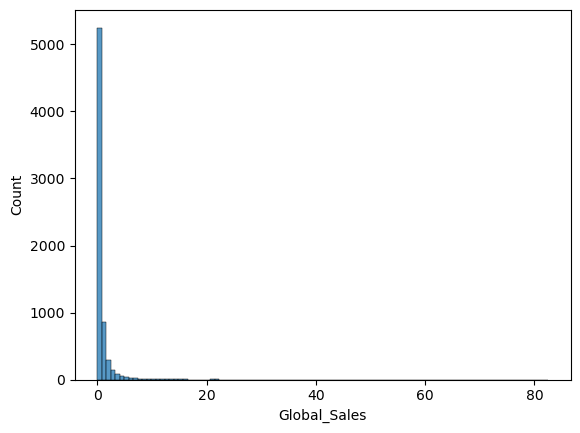

In [18]:
# creating a histogram plot of global sales
sns.histplot(clean_df["Global_Sales"], bins = 100, kde = False)


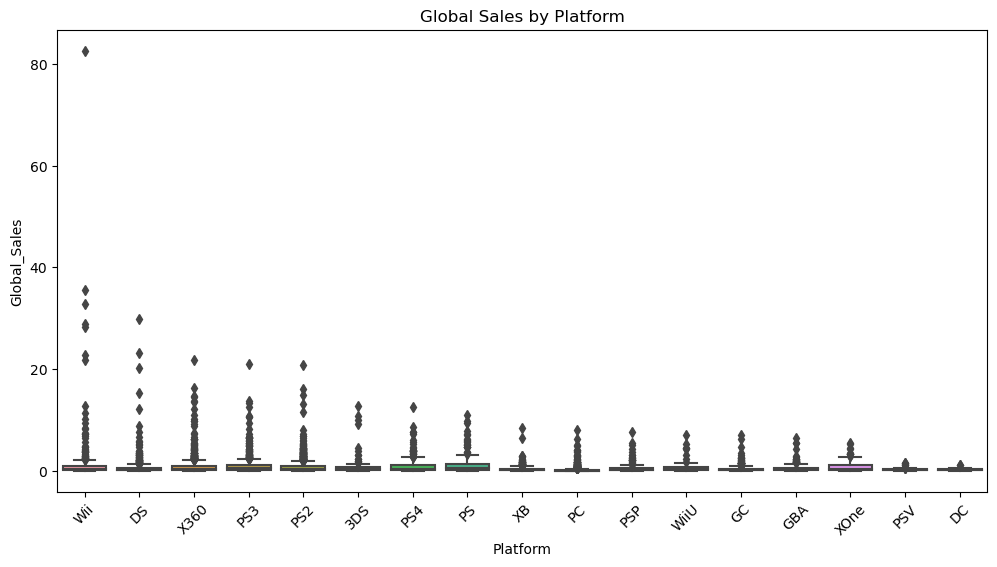

In [19]:
# Boxplot of global sales by platform
plt.figure(figsize=(12, 6))
sns.boxplot(x='Platform', y='Global_Sales', data=clean_df)
plt.title("Global Sales by Platform")
plt.xticks(rotation=45)
plt.show()


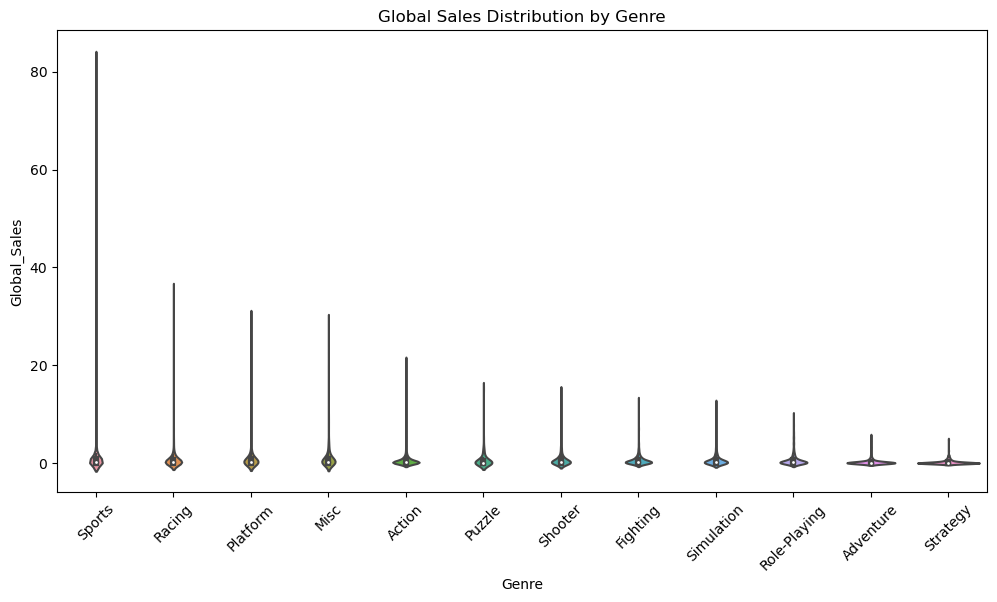

In [20]:
# Violin Plot for Global Sales by Genre:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Genre', y='Global_Sales', data=clean_df)
plt.title("Global Sales Distribution by Genre")
plt.xticks(rotation=45)
plt.show()

## Time Series Sales by Region 

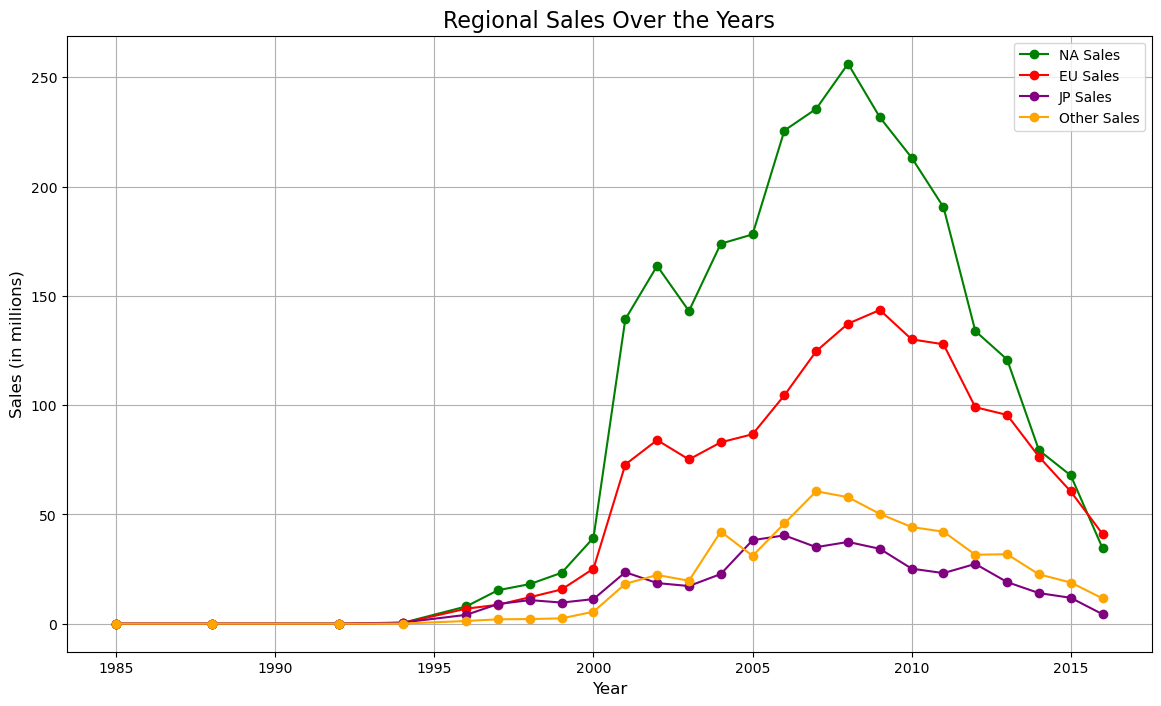

In [66]:
# Ensuring 'Year_of_Release' is numeric
clean_df['Year_of_Release'] = pd.to_numeric(clean_df['Year_of_Release'], errors='coerce')

# Convert year to integer for plotting
clean_df['Year_of_Release'] = clean_df['Year_of_Release'].astype(int)

# Aggregate data: Total sales by region per year
regional_sales = clean_df.groupby('Year_of_Release').agg(
    NA_Sales=('NA_Sales', 'sum'),
    EU_Sales=('EU_Sales', 'sum'),
    JP_Sales=('JP_Sales', 'sum'),
    Other_Sales=('Other_Sales', 'sum')
).reset_index()

# Plotting all regional sales in one chart
plt.figure(figsize=(14, 8))

# Plot regional sales
plt.plot(
    regional_sales['Year_of_Release'], 
    regional_sales['NA_Sales'], 
    label='NA Sales', 
    marker='o', 
    color='green'
)
plt.plot(
    regional_sales['Year_of_Release'], 
    regional_sales['EU_Sales'], 
    label='EU Sales', 
    marker='o', 
    color='red'
)
plt.plot(
    regional_sales['Year_of_Release'], 
    regional_sales['JP_Sales'], 
    label='JP Sales', 
    marker='o', 
    color='purple'
)
plt.plot(
    regional_sales['Year_of_Release'], 
    regional_sales['Other_Sales'], 
    label='Other Sales', 
    marker='o', 
    color='orange'
)

# Plot customization
plt.title('Regional Sales Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales (in millions)', fontsize=12)
plt.legend()
plt.grid(True)
plt.savefig('./Time Series Sales')
plt.show()


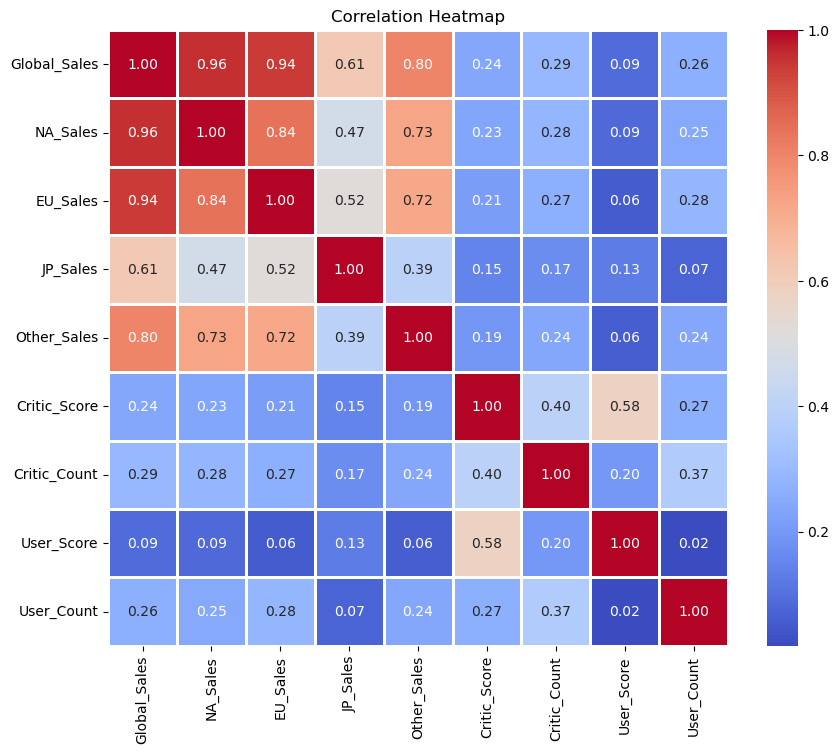

In [69]:
# Calculate the correlation matrix of all numeric column
corr = clean_df[['Global_Sales','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']].corr()

# Create a heatmap of the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title("Correlation Heatmap")
plt.savefig('./correlation of variables')
plt.show()


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

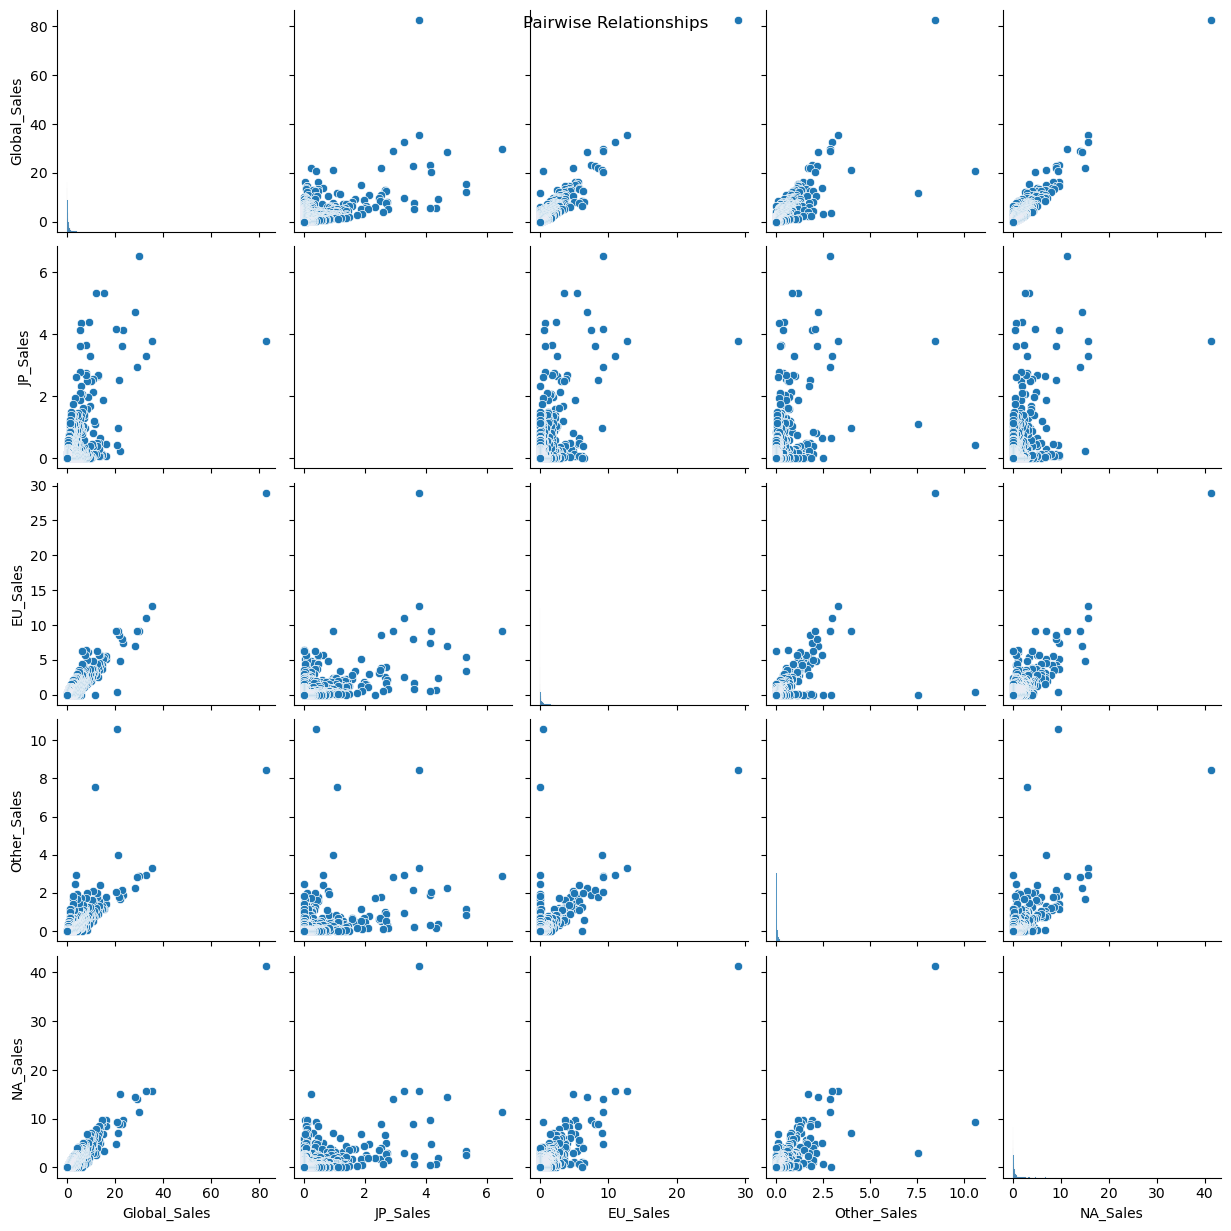

In [22]:
# Pairplot for selected numerical columns
sns.pairplot(clean_df[['Global_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales', 'NA_Sales']])
plt.suptitle("Pairwise Relationships")
plt.show()


## Plotting the countplot for categorical features

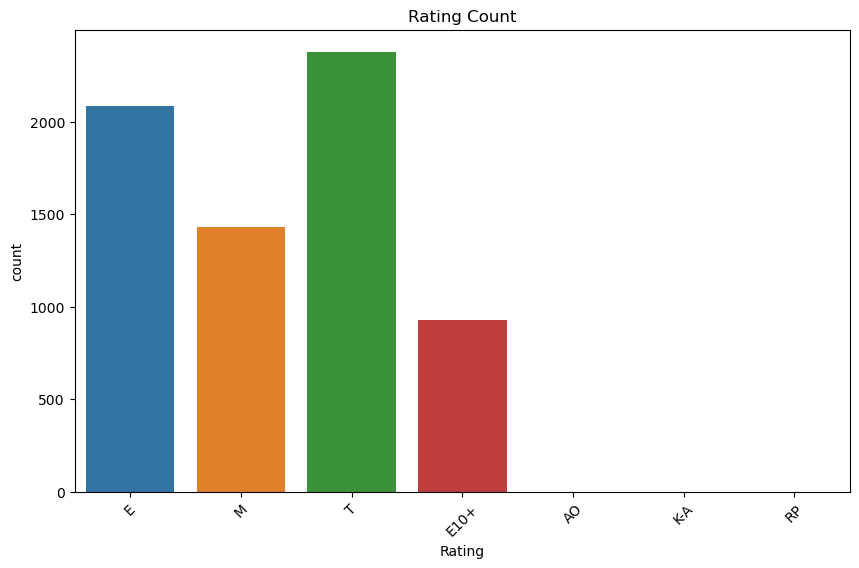

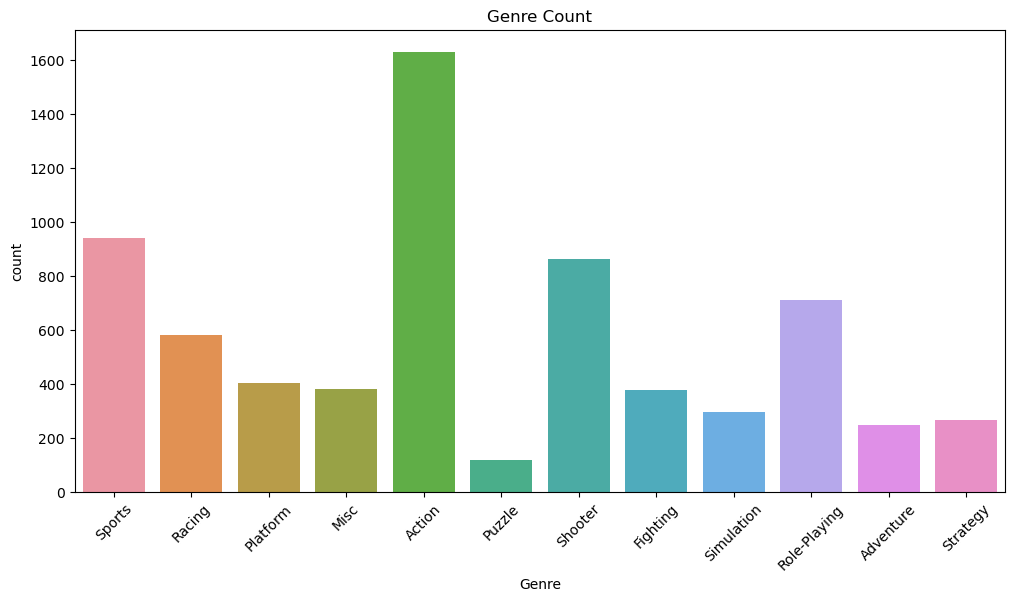

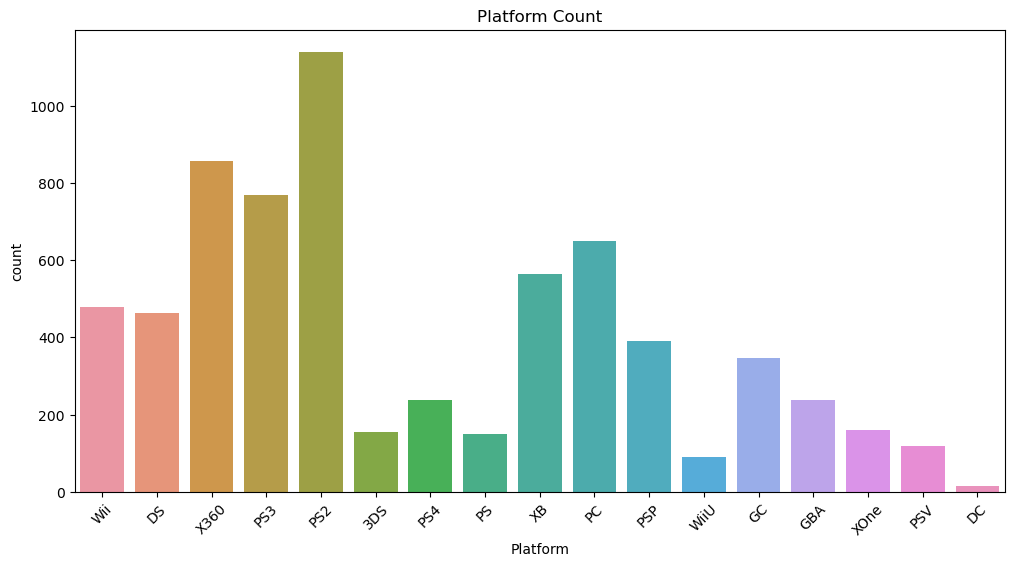

In [72]:
# countplot for rating
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=clean_df)
plt.title("Rating Count")
plt.xticks(rotation=45)
plt.show()


# countplot for Genre 
plt.figure(figsize=(12, 6))
sns.countplot(x='Genre', data=clean_df)
plt.title("Genre Count")
plt.xticks(rotation=45)
plt.savefig('./game_genre')
plt.show()

# countplot for platform 
plt.figure(figsize=(12, 6))
sns.countplot(x='Platform', data=clean_df)
plt.title("Platform Count")
plt.xticks(rotation=45)
plt.show()

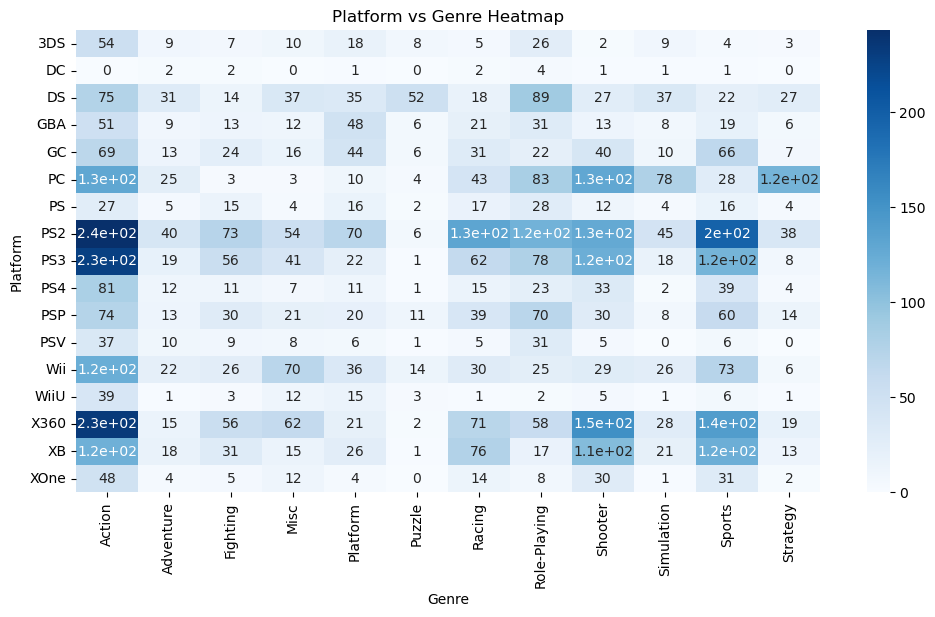

In [24]:
# Creating a pivot table and then a heatmap for categorical columns
platform_genre_pivot = clean_df.pivot_table(index='Platform', columns='Genre', aggfunc='size', fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(platform_genre_pivot, cmap='Blues', annot=True)
plt.title("Platform vs Genre Heatmap")
plt.show()


## Task A.
- Compare regression models that predict the “global sales” of video games based on a single numerical input feature. Based on your results, which numerical variable in the dataset is the best predictor for “global sales” of video games and why? For each numerical input feature, is the global sales better fit by a linear model or by a non- linear (e.g. polynomial) model?

## Feature Extraction of Numerical Variables

In [27]:
# Create Variable to store numerical variables in the dataset as the x num
x_num = clean_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y = clean_df['Global_Sales']

## Linear Models predicting Global Sales

In [33]:
# create dictionary to store each regression model for single numerical input features
linear_dict = {}  # Dictionary to store results for linear models

# Create an instance of StandardScaler to scale features
scale = StandardScaler()

# Use a for loop to create linear regression models for each single numerical input to determine the best model
for feature in x_num.columns:
    
    # Create variable to store the feature as a single x variable from the x_numerical array
    # This extracts the current feature column and converts it to a numpy array
    x_single = x_num[[feature]].values
    
    # Split the data into training and testing sets (80/20 split)
    # x_train_single and x_test are the features, and y_train and y_test are the target variables (global sales)
    x_train, x_test, y_train, y_test = train_test_split(x_single, y, test_size=0.2, random_state=42)
    
    # LINEAR MODEL
    # Scale the features using StandardScaler
    scale.fit(x_train)  # Fit the scaler to the training data
    x_train_scaled = scale.transform(x_train)  # Apply scaling to the training data
    x_test_scaled = scale.transform(x_test)  # Apply scaling to the testing data
    
    # Create a Linear Regression model for the current feature
    linear_model = LinearRegression()
    
    # Fit the model with the scaled training data of the single feature
    linear_model.fit(x_train_scaled, y_train)
    
    # Predict the target (global sales) values for the testing data using the fitted model
    y_pred = linear_model.predict(x_test_scaled)
    
    # Append the results to the 'linear_dict' dictionary
    # Use RMSE, R2, and MAE as performance metrics to evaluate the model
    linear_dict[f'Linear Regression of {feature}'] = {
        'RMSE': mean_squared_error(y_test, y_pred),  # Root Mean Squared Error (RMSE)
        'R2': r2_score(y_test, y_pred),  # R-squared (Goodness of fit)
        'MAE': mean_absolute_error(y_test, y_pred),  # Mean Absolute Error (MAE)
        'Coefficients': linear_model.coef_,  # Coefficients of the linear model
        'Intercept': linear_model.intercept_  # Intercept of the linear model
    }
linear_dict

# check the size of the training and test sets

print("There are %d data points in the training set." % (len(x_train), ))
print("There are %d data points in the testing set." % (len(x_test), ))

There are 5460 data points in the training set.
There are 1365 data points in the testing set.


In [34]:
linear_dict

{'Linear Regression of NA_Sales': {'RMSE': <tf.Tensor: shape=(), dtype=float64, numpy=0.36949580788471836>,
  'R2': 0.8640390780704896,
  'MAE': 0.24988980353506796,
  'Coefficients': array([1.95257597]),
  'Intercept': 0.7680311355311353},
 'Linear Regression of EU_Sales': {'RMSE': <tf.Tensor: shape=(), dtype=float64, numpy=0.4131249647812544>,
  'R2': 0.8479851465560325,
  'MAE': 0.3061894286217936,
  'Coefficients': array([1.91686385]),
  'Intercept': 0.7680311355311354},
 'Linear Regression of JP_Sales': {'RMSE': <tf.Tensor: shape=(), dtype=float64, numpy=2.101635843624623>,
  'R2': 0.22667499667964275,
  'MAE': 0.6930925233750604,
  'Coefficients': array([1.28757084]),
  'Intercept': 0.7680311355311354},
 'Linear Regression of Other_Sales': {'RMSE': <tf.Tensor: shape=(), dtype=float64, numpy=0.8162473608369082>,
  'R2': 0.6996508719889443,
  'MAE': 0.3837257505078274,
  'Coefficients': array([1.62393869]),
  'Intercept': 0.7680311355311354}}

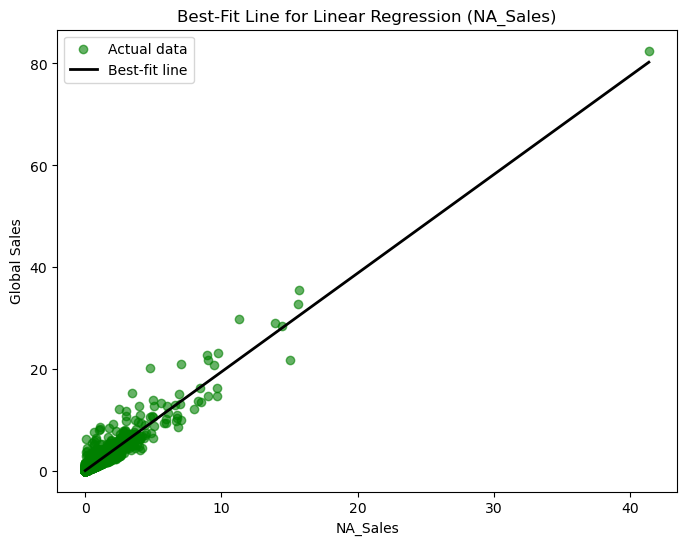

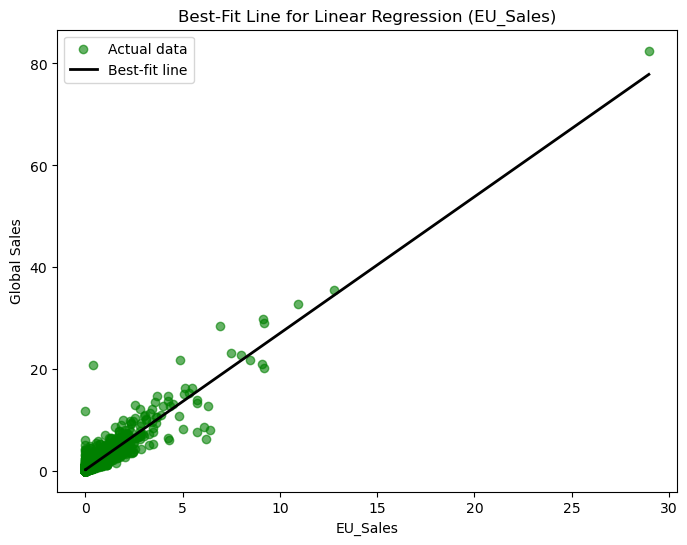

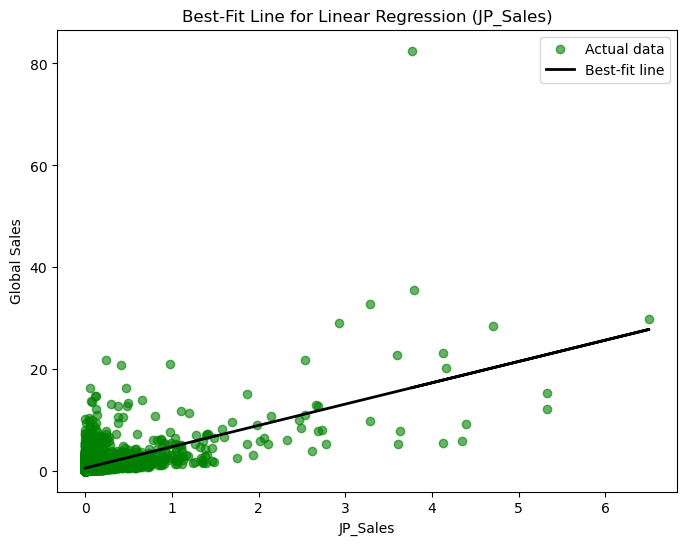

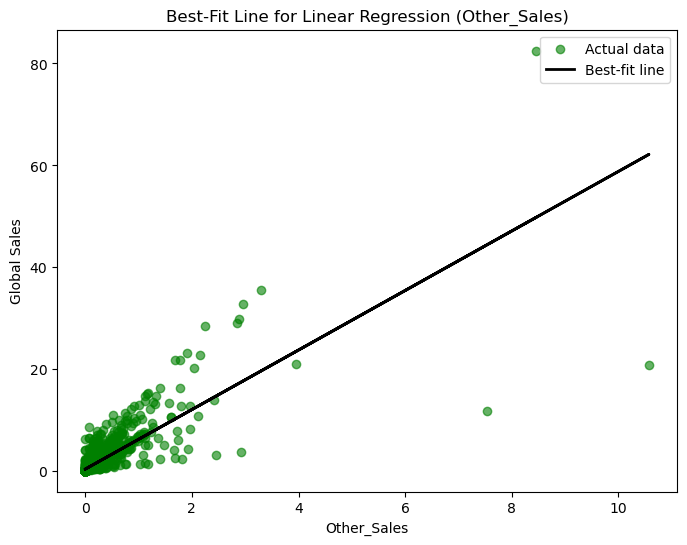

In [29]:
# Iterate through the results for linear regression models
for feature in x_num.columns:
    # Create the figure and axis objects for plotting
    plt.figure(figsize=(8, 6))
    
    # Extract the feature values for the current feature
    x_single = x_num[[feature]].values
    
    # Reshape for fitting if necessary (for single feature in 2D)
    x_single_reshaped = x_single.reshape(-1, 1)
    
    # Create a Linear Regression model and fit it with the data
    linear_model = LinearRegression()
    linear_model.fit(x_single_reshaped, y)
    
    # Predict the global sales using the trained model
    y_pred = linear_model.predict(x_single_reshaped)
    
    # Plot the actual data as a scatter plot
    plt.scatter(x_single, y, color='green', label='Actual data', alpha=0.6)
    
    # Plot the best-fit line (predicted values)
    plt.plot(x_single, y_pred, color='black', label='Best-fit line', linewidth=2)
    
    # Adding labels and title
    plt.xlabel(feature)
    plt.ylabel('Global Sales')
    plt.title(f'Best-Fit Line for Linear Regression ({feature})')
    plt.legend()
    
    # Display the plot
    plt.show()


## Polynomial Models predicting Global Sales

In [35]:
# Initialize the dictionary to store results for Polynomial models
poly_dict = {}

# Create an instance of StandardScaler to scale the features
scale = StandardScaler()

# Use a for loop to create regression models for each single numerical input to determine the best model
for feature in x_num.columns:
    # Extract the feature values
    x_single = x_num[[feature]].values  # Get the feature as a 2D array
    
    # Ensure that x is reshaped correctly for polynomial transformation
    x_single = x_single.reshape(-1, 1)  # Reshape the feature to be a 2D array with shape (n_samples, 1)
    
    # Create a Polynomial model for the current feature with degree=2 (quadratic)
    poly_model = PolynomialFeatures(degree=2)
    
    # Fit the model with the feature values and generate polynomial features
    x_poly = poly_model.fit_transform(x_single)
    
    # Split the polynomial features into training and testing sets
    x_train_poly, x_test_poly, y_train_poly, y_test_poly = train_test_split(x_poly, y, test_size=0.2, random_state=42)
    
    # Scale the polynomial features
    x_train_poly_scaled = scale.fit_transform(x_train_poly)  # Apply scaling to the polynomial training data
    x_test_poly_scaled = scale.transform(x_test_poly)  # Apply scaling to the polynomial testing data
    
    # Create a Linear Regression model to fit the polynomial features
    poly_reg = LinearRegression()
    
    # Fit the model with the scaled training data of polynomial features
    poly_reg.fit(x_train_poly_scaled, y_train_poly)
    
    # Predict the target (global sales) values for the testing data using the fitted polynomial model
    y_pred_poly = poly_reg.predict(x_test_poly_scaled)
    
    # Append the results to the 'poly_dict' dictionary
    # Use RMSE, R2, and MAE as performance metrics to evaluate the model
    poly_dict[f'Polynomial_{feature}'] = {
        'RMSE': mean_squared_error(y_test_poly, y_pred_poly),  # Root Mean Squared Error (RMSE)
        'R2': r2_score(y_test_poly, y_pred_poly),  # R-squared (Goodness of fit)
        'MAE': mean_absolute_error(y_test_poly, y_pred_poly),  # Mean Absolute Error (MAE)
        'Coefficients': poly_reg.coef_,  # Coefficients of the polynomial model
        'Intercept': poly_reg.intercept_  # Intercept of the polynomial model
    }

# View results for the polynomial models
poly_dict


{'Polynomial_NA_Sales': {'RMSE': <tf.Tensor: shape=(), dtype=float64, numpy=0.36365450463916965>,
  'R2': 0.8661884636862053,
  'MAE': 0.24716643457266096,
  'Coefficients': array([0.        , 1.90870396, 0.05891938]),
  'Intercept': 0.7680311355311275},
 'Polynomial_EU_Sales': {'RMSE': <tf.Tensor: shape=(), dtype=float64, numpy=0.40942786621780325>,
  'R2': 0.8493455433952516,
  'MAE': 0.30995666067558975,
  'Coefficients': array([0.        , 1.82890204, 0.11613397]),
  'Intercept': 0.7680311355311219},
 'Polynomial_JP_Sales': {'RMSE': <tf.Tensor: shape=(), dtype=float64, numpy=2.1474458104425107>,
  'R2': 0.20981860700156652,
  'MAE': 0.692487376406593,
  'Coefficients': array([0.        , 1.06617884, 0.25265798]),
  'Intercept': 0.768031135531134},
 'Polynomial_Other_Sales': {'RMSE': <tf.Tensor: shape=(), dtype=float64, numpy=0.7576676500385616>,
  'R2': 0.7212060596705112,
  'MAE': 0.3321390734370781,
  'Coefficients': array([ 0.       ,  2.3935234, -0.931135 ]),
  'Intercept': 0.7

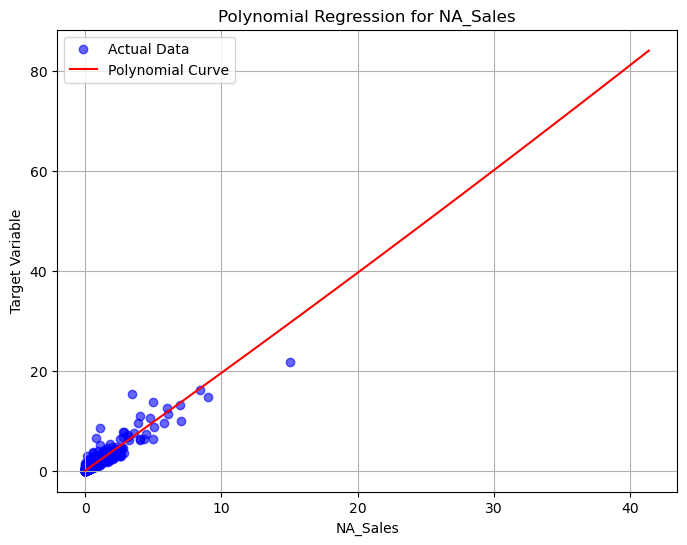

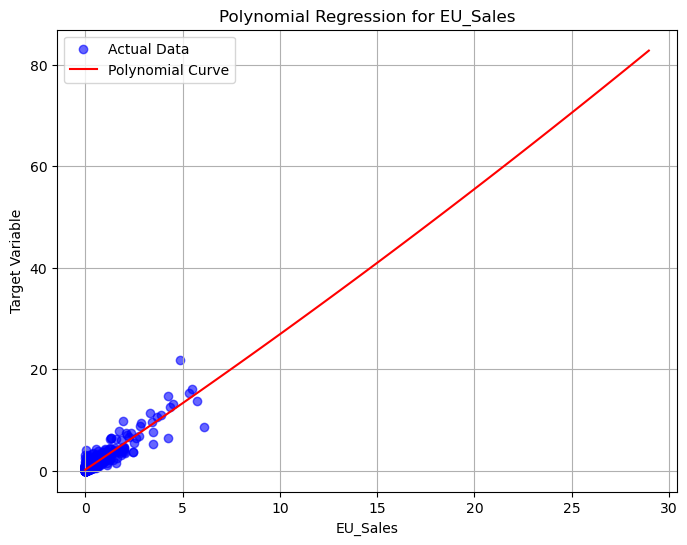

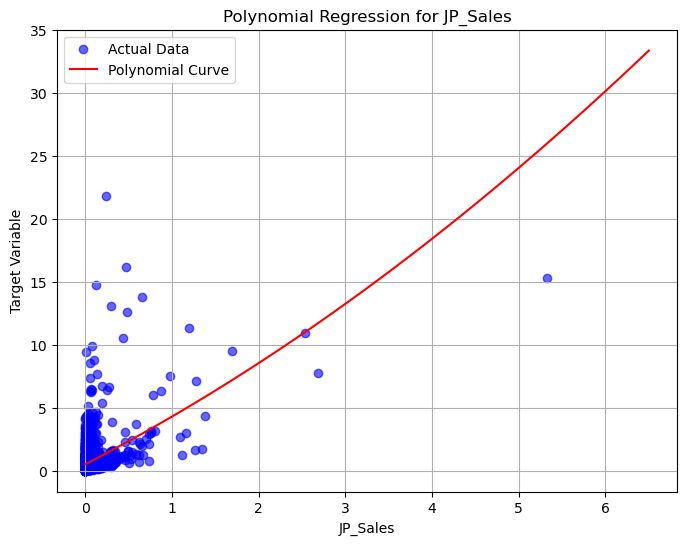

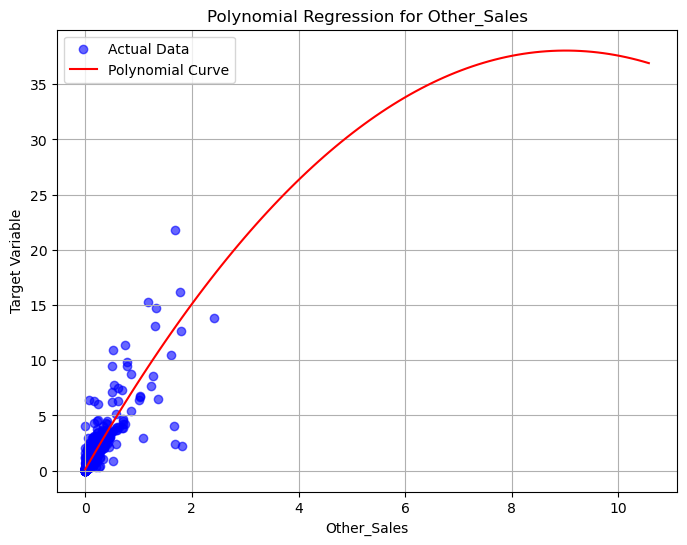

In [38]:
# Looping through each feature in the dictionary
for feature, results in poly_dict.items():
    # Extract the actual feature name (remove "Polynomial_" prefix)
    feature_name = feature.replace("Polynomial_", "")
    
    # Extract the feature values
    x_single = x_num[[feature_name]].values.reshape(-1, 1)  # Get the original feature as a 2D array
    
    # Create Polynomial Features with degree=2
    poly_model = PolynomialFeatures(degree=2)
    x_poly = poly_model.fit_transform(x_single)
    
    # Split the data for plotting purposes
    x_train_poly, x_test_poly, y_train_poly, y_test_poly = train_test_split(x_poly, y, test_size=0.2, random_state=42)
    scale.fit(x_train_poly)
    x_test_poly_scaled = scale.transform(x_test_poly)
    
    # Predictions
    y_pred_poly = results['Intercept'] + np.dot(x_test_poly_scaled, results['Coefficients'])
    
    # Generate a smooth curve for plotting
    x_range = np.linspace(x_single.min(), x_single.max(), 100).reshape(-1, 1)
    x_range_poly = poly_model.transform(x_range)  # Transform to polynomial features
    x_range_poly_scaled = scale.transform(x_range_poly)  # Scale the polynomial features
    y_range = results['Intercept'] + np.dot(x_range_poly_scaled, results['Coefficients'])
    
    # Plot the actual vs predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(x_test_poly[:, 1], y_test_poly, color="blue", alpha=0.6, label="Actual Data")  # x_test_poly[:, 1] = original feature
    plt.plot(x_range, y_range, color="red", label="Polynomial Curve")
    plt.title(f"Polynomial Regression for {feature_name}")
    plt.xlabel(f"{feature_name}")
    plt.ylabel("Target Variable")
    plt.legend()
    plt.grid()
    plt.show()


# Task B.

- Consider regression models that take multiple numerical variables as input features
to predict the “global sales” of video games. Does the inclusion of multiple input
features improve the accuracy of the model’s prediction compared to the single-input
feature models that you explored in part (a)?

## Multiple Linear Regression Model
- This multiple linear regression takes six numerical input features

## Feature Extraction 

In [28]:
# extracting the numeric featres for the multiple linear regression, and the predictor variable 'Global Sales'
x_multiple = clean_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y_mult = clean_df['Global_Sales']

In [29]:
# Splitting the x and y data between the training and testing datasets using the train test split method()
x_train, x_test, y_train, y_test = train_test_split(x_multiple, y_mult, test_size = 0.2, random_state = 42)

In [30]:
# creating an instance of standard scalar
scale = StandardScaler()

In [31]:
# Fitting the standard scaler to the input data 
scale.fit(x_train)

# applying the standard scalar class to the train and test sets
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)


In [32]:
# Create an instance of the model
global_linear = LinearRegression()

In [33]:
# Fit the model to the training data.
global_linear.fit(x_train_scaled, y_train)

LinearRegression()

In [34]:
# extracting the fit coefficients from the best-fit model.
intercept = global_linear.intercept_
coefficients = global_linear.coef_
# Print the coefficients.
print("coefficients: ", coefficients)
print("intercept: ", intercept)

coefficients:  [0.98800271 0.7099649  0.30006205 0.28440964]
intercept:  0.7680311355311354


In [35]:
# Using the trained model to predict the Global Sales
global_pred = global_linear.predict(x_test_scaled)

In [38]:
# Calculating the mean absolute error
mean_abs = mean_absolute_error(y_test, global_pred)
# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, global_pred)
# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)
# Calculate the R2 score
R2 = r2_score(y_test, global_pred)
# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

Mean absolute error:  0.003772641347780801
Mean squared error:  tf.Tensor(3.661103865240321e-05, shape=(), dtype=float64)
Root mean squared error:  0.006050705632602136
R2:  0.9999865284789117


# Task C. 
- In parts (a) and (b), you only considered models that use the numerical variables from
the dataset as inputs. However, there are also several categorical variables in the
dataset that are likely to affect the global sales of video games. Now train a regression
model that uses all relevant input variables (both categorical and numerical) to predict
the global sales of video games (e.g. a Random Forest Regressor model). Does this
improve the accuracy of your results?

## Random Forest Regressor Model for categorical variables
- The categorical variables used will be Platform, Year_of_Release, Genre, and Publisher.

In [40]:
# hot encode categorical features
encoded_df = pd.get_dummies(clean_df, columns=['Platform', 'Genre', 'Publisher', 'Developer', 'Rating'])
encoded_df.dtypes

Name                object
Year_of_Release    float64
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
                    ...   
Rating_E10+           bool
Rating_K-A            bool
Rating_M              bool
Rating_RP             bool
Rating_T              bool
Length: 1598, dtype: object

In [41]:
# drop 'Name' column
encoded_df = encoded_df.drop('Name', axis=1)
encoded_df

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,...,Developer_odenis studio,Developer_syn Sophia,Developer_zSlide,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,2006.0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,...,False,False,False,False,True,False,False,False,False,False
2,2008.0,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,...,False,False,False,False,True,False,False,False,False,False
3,2009.0,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,...,False,False,False,False,True,False,False,False,False,False
6,2006.0,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,...,False,False,False,False,True,False,False,False,False,False
7,2006.0,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,2001.0,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,...,False,False,False,False,True,False,False,False,False,False
16677,2002.0,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,...,False,False,False,False,False,False,False,True,False,False
16696,2014.0,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,...,False,False,False,False,False,False,False,True,False,False
16700,2011.0,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,...,False,False,False,False,False,False,False,False,False,True


In [45]:
# defining a random forest function to predict global sales
def preprocess_and_train_random_forest(data, target, test_size=0.2, random_state=42):
    """
    Preprocess the DataFrame by encoding non-numeric features and train a Random Forest Regressor.

    Parameters:
    - data (pd.DataFrame): The input DataFrame with features.
    - target (float): The name of the target column to predict.
    - test_size (float): Proportion of the dataset to include in the test split.
    - random_state (int): Random seed for reproducibility.

    Returns:
    - model (RandomForestRegressor): The trained Random Forest model.
    - metrics (dict): A dictionary with evaluation metrics (RMSE, R2, MAE).
    """
    # Split features and target
    X = encoded_df.drop(columns=['Global_Sales'])  # All columns except the target
    y = encoded_df['Global_Sales']  # Target column
    
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Initialize and train the Random Forest Regressor
    rf_model = RandomForestRegressor(random_state=random_state, n_estimators=100)
    rf_model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = rf_model.predict(X_test)
    
    # Calculate evaluation metrics
    metrics = {
        'RMSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred)
    }
    
    return rf_model, metrics

target_column = 'Global_Sales'  # target column
#  `encoded_df' contains the combined dataset (numeric and one-hot encoded categorical features)
rf_model, rf_metrics = preprocess_and_train_random_forest(encoded_df, target_column)

# Print the metrics
print("Random Forest Model Metrics:")
for metric, value in rf_metrics.items():
    print(f"{metric}: {value:.4f}")


Random Forest Model Metrics:
RMSE: 0.0482
R2: 0.9823
MAE: 0.0466


## Task D.
- Develop an Artificial Neural Network (ANN) model to predict the global sales of video
games based on all the available information from the dataset. How does its
performance compare to the other supervised learning models that you have
considered? Discuss your choices for the architecture of the neural network that you


## Artificial Neural Network Model 1. 
- Building the Neural Network using the Four Stages
- Constructor Stage - Architecture of the Model
- Compilation Stage - Compiling the model with optimizers and other necessary hyperparameters
- Training Stage - Training the model for a certain number of Epochs
- Evaluation Stage - Evaluating the model

### Feature Extraction
- Extract numeric input variables in the dataset

In [90]:
# Create Variable to store numerical variables in the dataset as the x num
x_numeric = clean_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y = clean_df['Global_Sales']

In [91]:
# split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_numeric, y, test_size = 0.2, random_state = 42)

# print the percentage of the data points according to the 80% & 20% split.
print("There are %d data points in the training set." %
(len(x_train), ))
print("There are %d data points in the testing set." %
(len(x_test), ))

There are 5460 data points in the training set.
There are 1365 data points in the testing set.


In [92]:
# applying MinMax Standardization
# import the MinMaxScaler function from sklearn
from sklearn.preprocessing import MinMaxScaler

#  apply scaling to the input features
scale = MinMaxScaler()
scale.fit(x_numeric)

MinMaxScaler()

In [93]:
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)
x_train_scaled # print input features scaled

array([[0.00870406, 0.01553867, 0.        , 0.01324503],
       [0.01523211, 0.00069061, 0.        , 0.00283822],
       [0.0094294 , 0.00448895, 0.00307692, 0.0037843 ],
       ...,
       [0.0012089 , 0.        , 0.00615385, 0.00189215],
       [0.00193424, 0.0003453 , 0.        , 0.00094607],
       [0.02321083, 0.01139503, 0.        , 0.01229896]])

### Constructor Stage
- One input kayer with ReLU
- First hidden with dropout of 20%
- Second hidden layer
- Outer Layer with Linear activation function

In [94]:
# use a function to build the ANN architecture

def build_ann(input_dim):
    """
    Build an Artificial Neural Network (ANN) model.

    Parameters:
    - input_dim (int): The number of input features.

    Returns:
    - model (Sequential): A compiled ANN model.
    """
    # Initialize the ANN model
    model = Sequential()
    
    # Input layer
    model.add(Dense(units=64, input_dim=input_dim, activation="relu"))
    
    # First hidden layer
    model.add(Dense(units=64, activation="relu"))
    
    # Dropout layer to reduce overfitting
    model.add(Dropout(0.2))
    
    # Second hidden layer
    model.add(Dense(units=64, activation="relu"))
    
    # Output layer
    model.add(Dense(units=1, activation="linear"))
    
    return model

model = build_ann(4)

# summary of model
model.summary()

C:\Users\hp\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,705 (34.00 KB)

 Trainable params: 8,705 (34.00 KB)

 Non-trainable params: 0 (0.00 B)

## Compilation Stage
- Compile using Adam optimizer (default learning rate)/
- Use mean square error as loss and accuracy

In [95]:
# compile the model with adam optimizer
model.compile(optimizer="adam", loss='mean_squared_error', metrics=['mean_squared_error'])

In [96]:
print(model)
print(x_train_scaled)
print(y_train)

<Sequential name=sequential, built=True>
[[0.00870406 0.01553867 0.         0.01324503]
 [0.01523211 0.00069061 0.         0.00283822]
 [0.0094294  0.00448895 0.00307692 0.0037843 ]
 ...
 [0.0012089  0.         0.00615385 0.00189215]
 [0.00193424 0.0003453  0.         0.00094607]
 [0.02321083 0.01139503 0.         0.01229896]]
2160     0.95
2976     0.68
3430     0.58
7997     0.18
10814    0.10
         ... 
6822     0.24
10306    0.11
10416    0.10
10884    0.09
1345     1.43
Name: Global_Sales, Length: 5460, dtype: float64


## Training Stage
- Train for 200 epochs
- Defined the early stopping criteria as validation loss
- Monitor the validation loss
- Use a patience of 20.

In [97]:
# training the model
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

# fit the model with early stopping
history = model.fit(x=x_train_scaled, y=y_train, batch_size=None, epochs=200, verbose='auto', validation_split=0.1, callbacks=[early_stopping])

Epoch 1/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - loss: 6.3518 - mean_squared_error: 6.3518 - val_loss: 1.5650 - val_mean_squared_error: 1.5650
Epoch 2/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7517 - mean_squared_error: 0.7517 - val_loss: 0.0626 - val_mean_squared_error: 0.0626
Epoch 3/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1628 - mean_squared_error: 0.1628 - val_loss: 0.0410 - val_mean_squared_error: 0.0410
Epoch 4/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0667 - mean_squared_error: 0.0667 - val_loss: 0.0341 - val_mean_squared_error: 0.0341
Epoch 5/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2145 - mean_squared_error: 0.2145 - val_loss: 0.0295 - val_mean_squared_error: 0.0295
Epoch 6/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0614 - mean_squared_error: 0.0614 - val_loss: 0.0489 - val_mean_squared_error: 0.0489
Epoch 7/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0485 - mean_squared_error: 0.0485 - val_l

## Evaluate Stage
- Fit the trained model to the scaled test data
- Use a plot to visualise the results the model predicts

In [104]:
# Predict the model outputs using the test data
y_pred = model.predict(x_test_scaled)

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


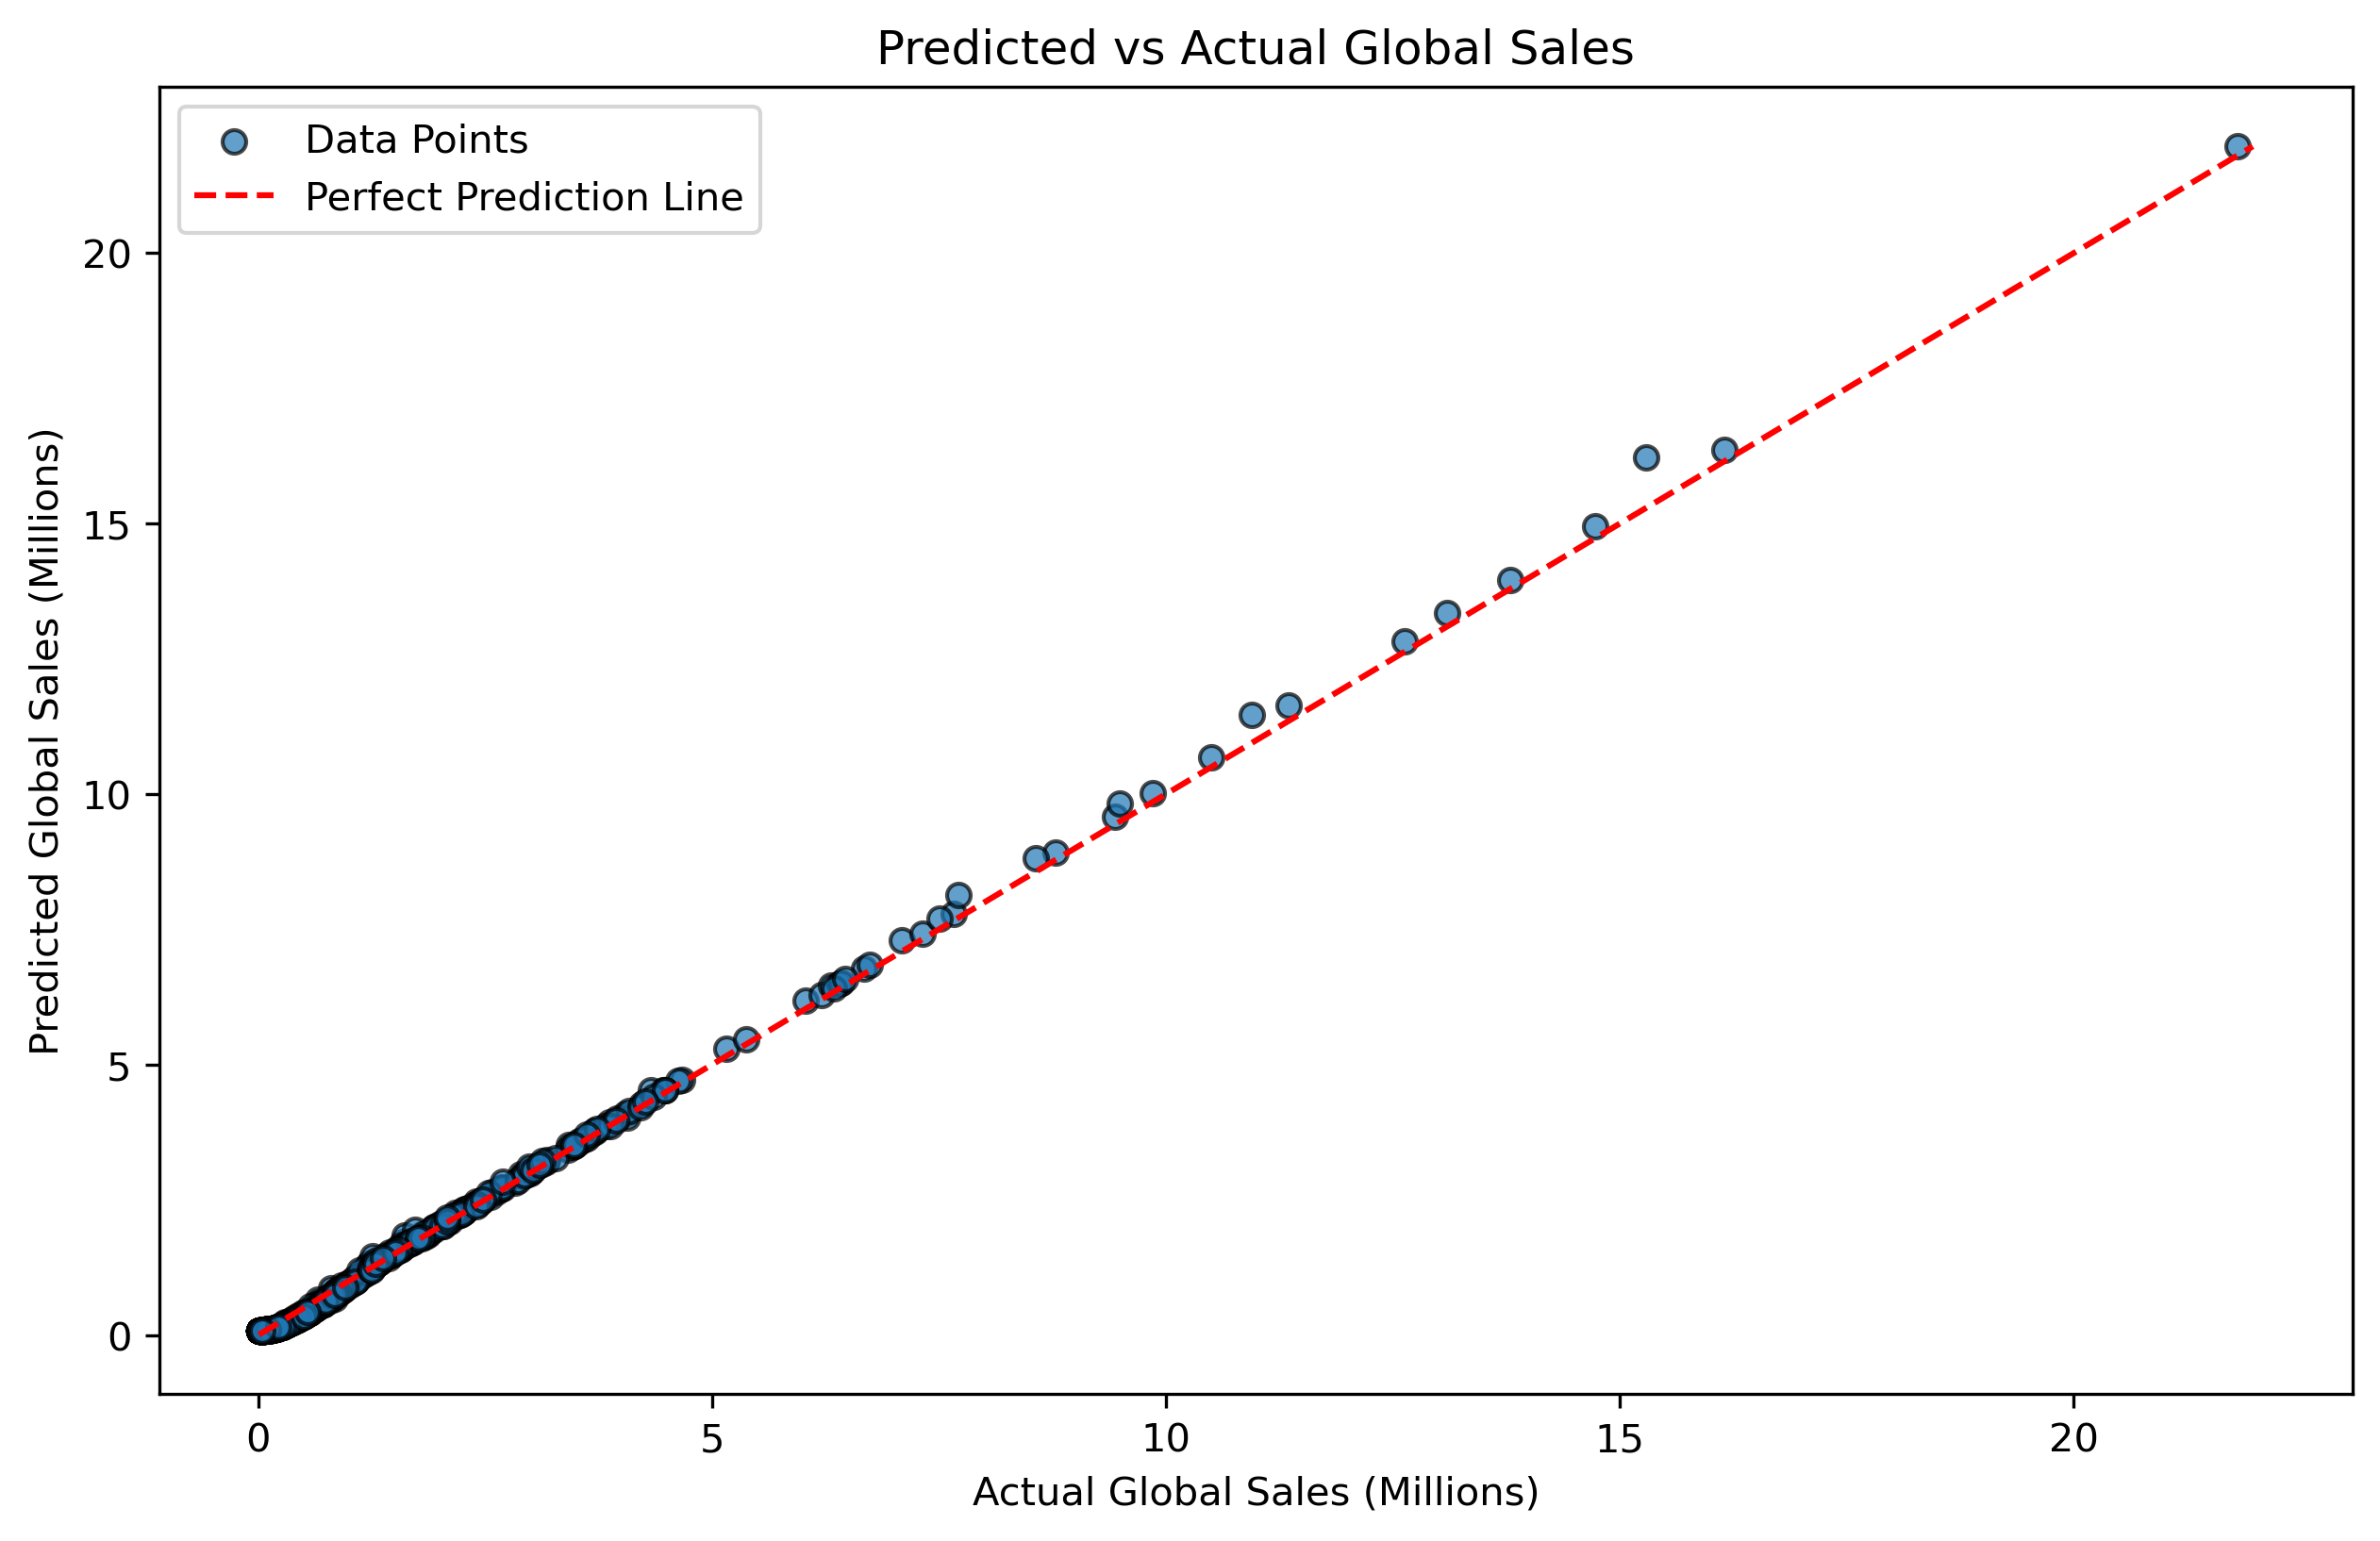

In [105]:
# define a function that takes two arguments actual vs predicted

def plot_predicted_vs_actual(y_test, y_pred, title="Predicted vs Actual Global Sales"):
    """
    Plot the predicted vs. actual values of the target variable.

    Parameters:
    - y_test (array-like): Actual values of the target variable.
    - y_pred (array-like): Predicted values of the target variable.
    - title (str): Title of the plot.
    """
    # Start by creating a figure
    plt.figure(figsize=(10, 6), dpi=300)

    # Creating a scatterplot comparing the predicted and actual values
    plt.scatter(y_test, y_pred, alpha=0.7, edgecolor='k', label="Data Points")

    # Adding a straight diagonal line to the plot
    min_val = min(min(y_test), min(y_pred))
    max_val = max(max(y_test), max(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="Perfect Prediction Line")

    # Label both axes
    plt.xlabel("Actual Global Sales (Millions)")
    plt.ylabel("Predicted Global Sales (Millions)")
    plt.title(title)

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

# Call the function to plot
plot_predicted_vs_actual(y_test, y_pred)


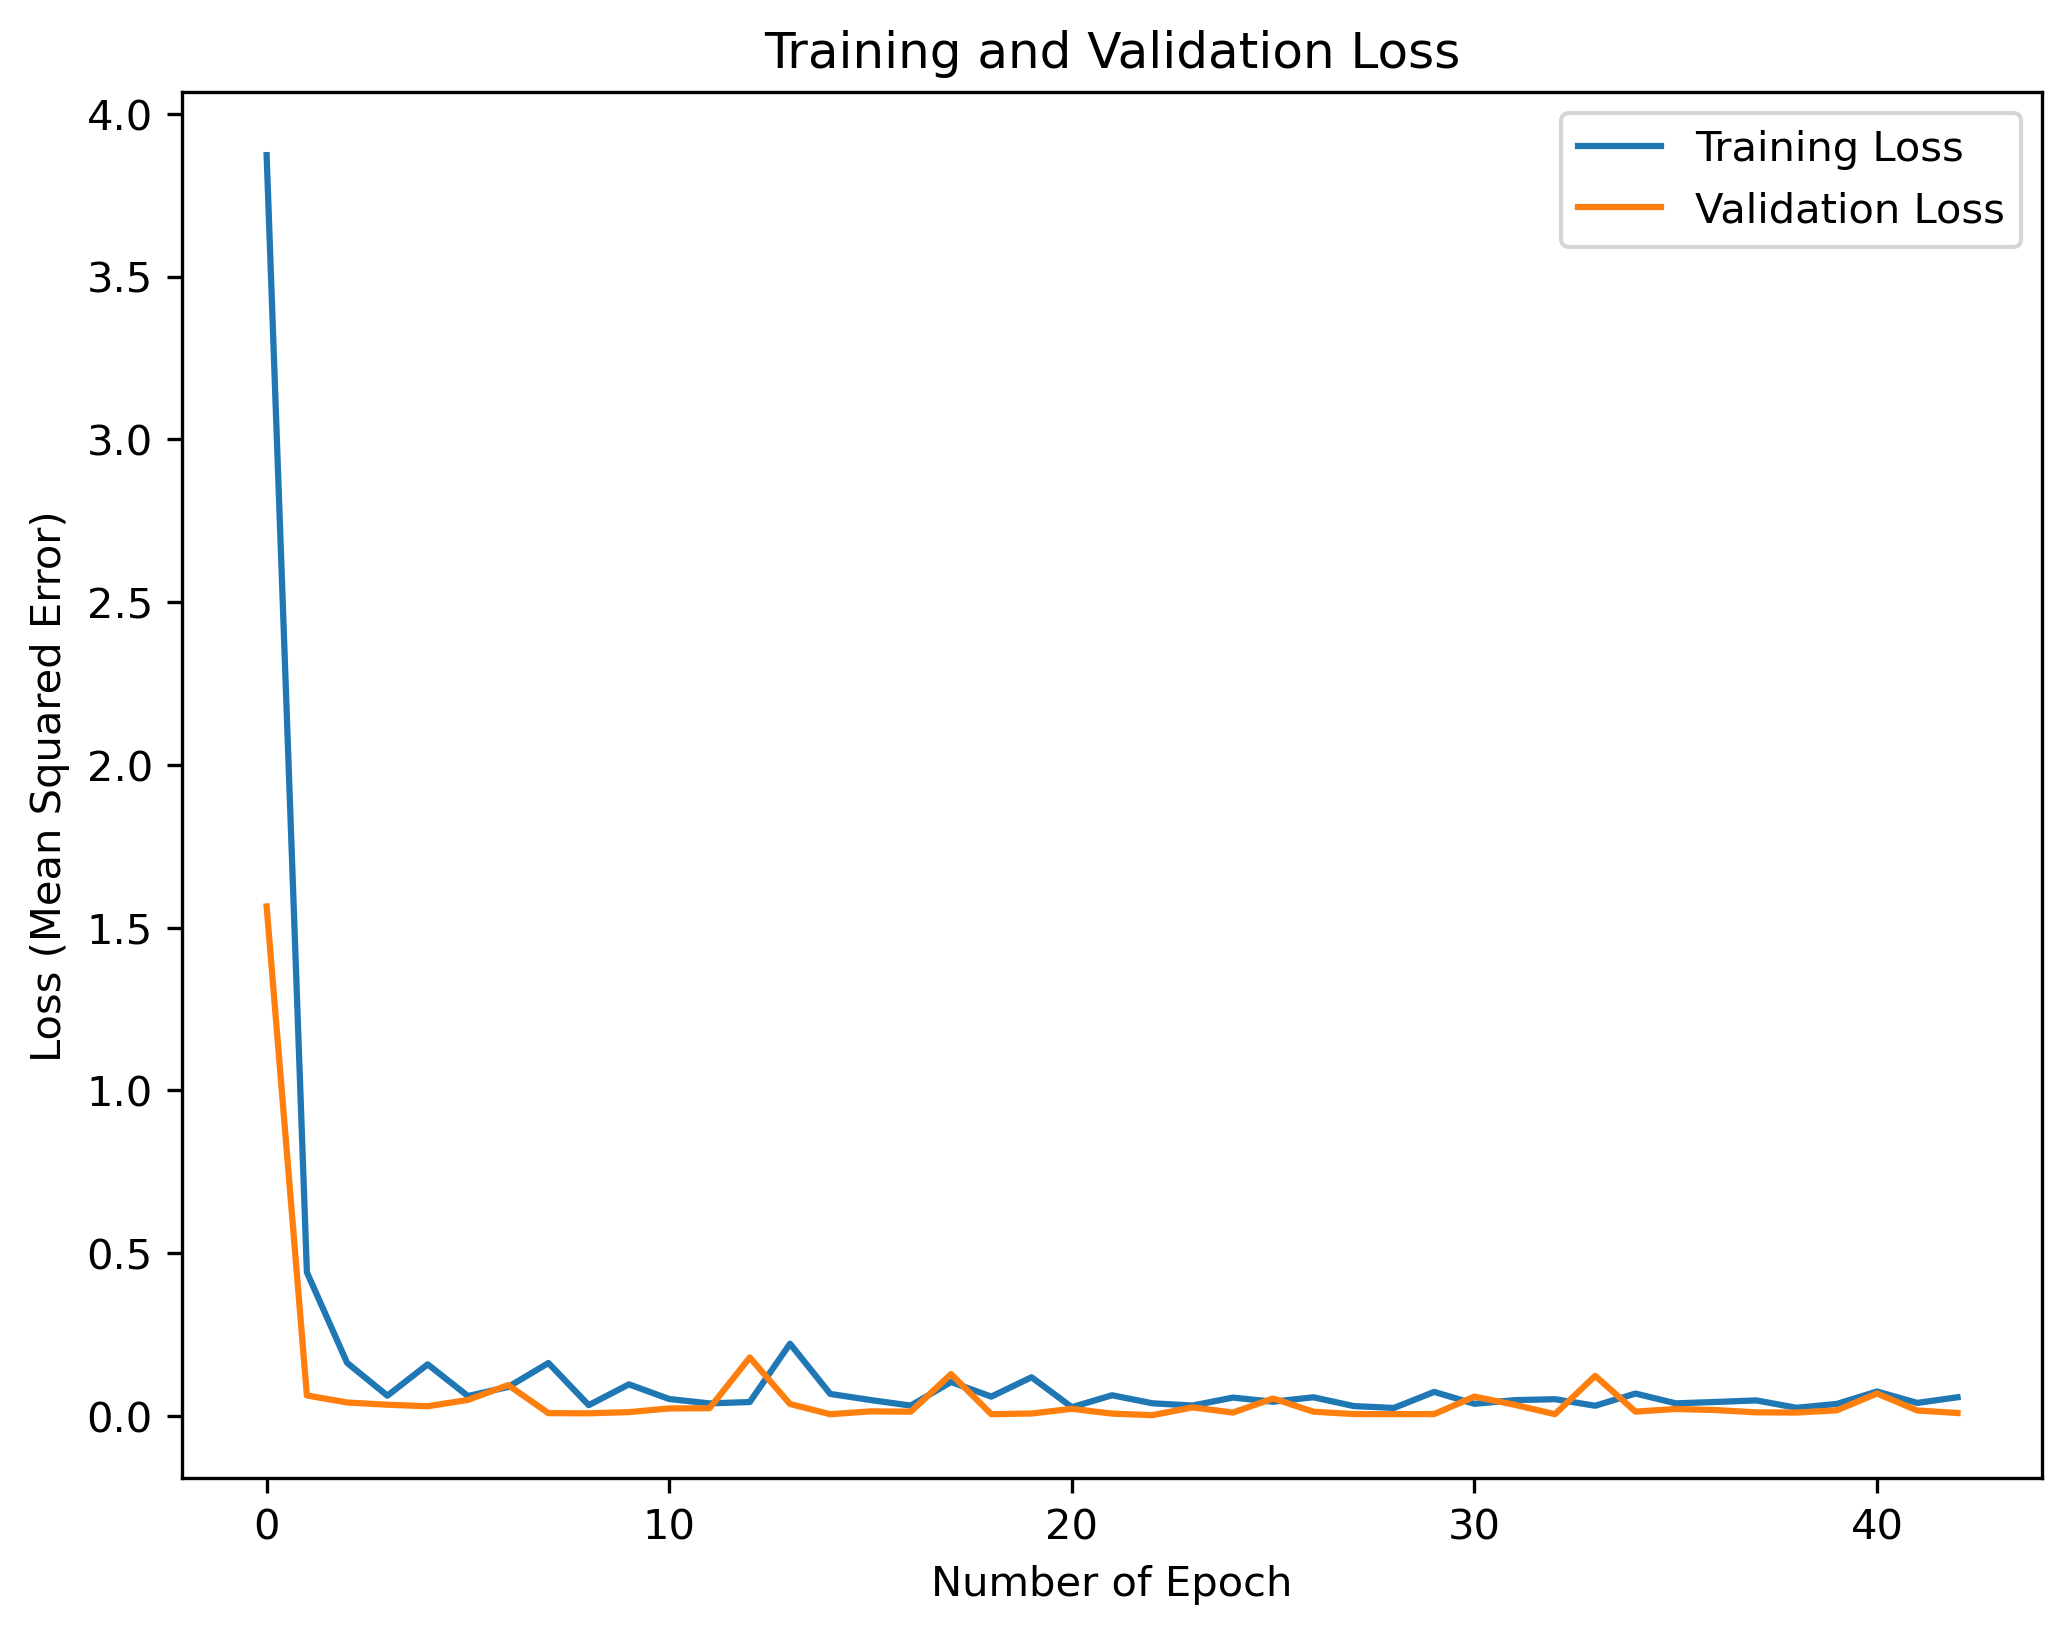

In [106]:
# define a function that taks the model training history and title of the plot

def plot_training_history(history, title="Training and Validation Loss"):
    """
    Plot the training and validation loss history from a Keras model.

    Parameters:
    - history: Keras History object after fitting a model.
    - title (str): Title of the plot.
    """
    # Convert the history object to a DataFrame
    history_df = pd.DataFrame(history.history)

    # Create a matplotlib figure
    plt.figure(figsize=(8, 6), dpi=300)

    # Plot the training and validation loss
    plt.plot(history_df["loss"], label="Training Loss")
    plt.plot(history_df["val_loss"], label="Validation Loss")

    # Add a legend
    plt.legend()

    # Label both axes
    plt.xlabel("Number of Epoch")
    plt.ylabel("Loss (Mean Squared Error)")
    plt.title(title)

    # Show the plot
    plt.show()

# Call the function to plot
plot_training_history(history)


# Artificial Neural Network Model 2.

### Constructor Stage
- One input kayer with ReLU
- First hidden with dropout of 20%
- Second hidden layer
- Third Hidden with dropout of 20%
- Outer Layer with Linear activation function

In [107]:
# use a function to build the ANN architecture

def build_ann(input_dim): # function takes input dimension as argument
    """
    Build an Artificial Neural Network (ANN) model.

    Parameters:
    - input_dim (int): The number of input features.

    Returns:
    - model (Sequential): A compiled ANN model.
    """
    # Initialize the ANN model
    model = Sequential()
    
    # Input layer
    model.add(Dense(units=64, input_dim=input_dim, activation="relu"))
    
    # First hidden layer
    model.add(Dense(units=64, activation="relu"))
    
    # Dropout layer to reduce overfitting
    model.add(Dropout(0.2))
    
    # Second hidden layer
    model.add(Dense(units=64, activation="relu"))
    
    # Third hidden layer
    model.add(Dense(units=64, activation="relu"))
    # Dropout layer to reduce overfitting
    model.add(Dropout(0.2))
    
    # Output layer
    model.add(Dense(units=1, activation="linear"))
    
    return model

ann_model2 = build_ann(4)

# summary of model
ann_model2.summary()

C:\Users\hp\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,865 (50.25 KB)

 Trainable params: 12,865 (50.25 KB)

 Non-trainable params: 0 (0.00 B)

### Compilation Stage
- Adam Optimizer with learning rate of 0.01
- Loss function is Mean Square Error
- Metrics is Mean Square Error

In [108]:
# create an instance of Adam class and set the learning rate to be 0.01
adam_optimizer = Adam(learning_rate=0.01)

#compile the second ANN model
ann_model2.compile(optimizer=adam_optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])

### Training Stage
- Train the model for 200 epochs
- Introduce Early stopping
- Monitor Validation loss and set patience to 20.

In [109]:
# import earlystopping from Keras
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

# fit the model with early stopping
history2 = ann_model2.fit(x=x_train_scaled, y=y_train, batch_size=None, epochs=200, verbose='auto', validation_split=0.1, callbacks=[early_stopping])

Epoch 1/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 1.3172 - mean_squared_error: 1.3172 - val_loss: 0.6976 - val_mean_squared_error: 0.6976
Epoch 2/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.0038 - mean_squared_error: 2.0038 - val_loss: 0.3570 - val_mean_squared_error: 0.3570
Epoch 3/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.0394 - mean_squared_error: 1.0394 - val_loss: 0.2963 - val_mean_squared_error: 0.2963
Epoch 4/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5365 - mean_squared_error: 0.5365 - val_loss: 0.9327 - val_mean_squared_error: 0.9327
Epoch 5/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.9942 - mean_squared_error: 1.9942 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epoch 6/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1815 - mean_squared_error: 0.1815 - val_loss: 0.0715 - val_mean_squared_error: 0.0715
Epoch 7/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.5250 - mean_squared_error: 1.5250 - val_los

### Evaluate Stage
- Fit the trained model to the scaled test data
- Use a plot to visualise the results the model predicts


In [110]:
# Predict the model outputs using the test data
y_pred2 = ann_model2.predict(x_test_scaled)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [111]:
#examine the predicted values
print(y_pred2)

[[4.3146567 ]
 [0.85651696]
 [0.64206135]
 ...
 [0.6326808 ]
 [0.52483296]
 [1.2262065 ]]


C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


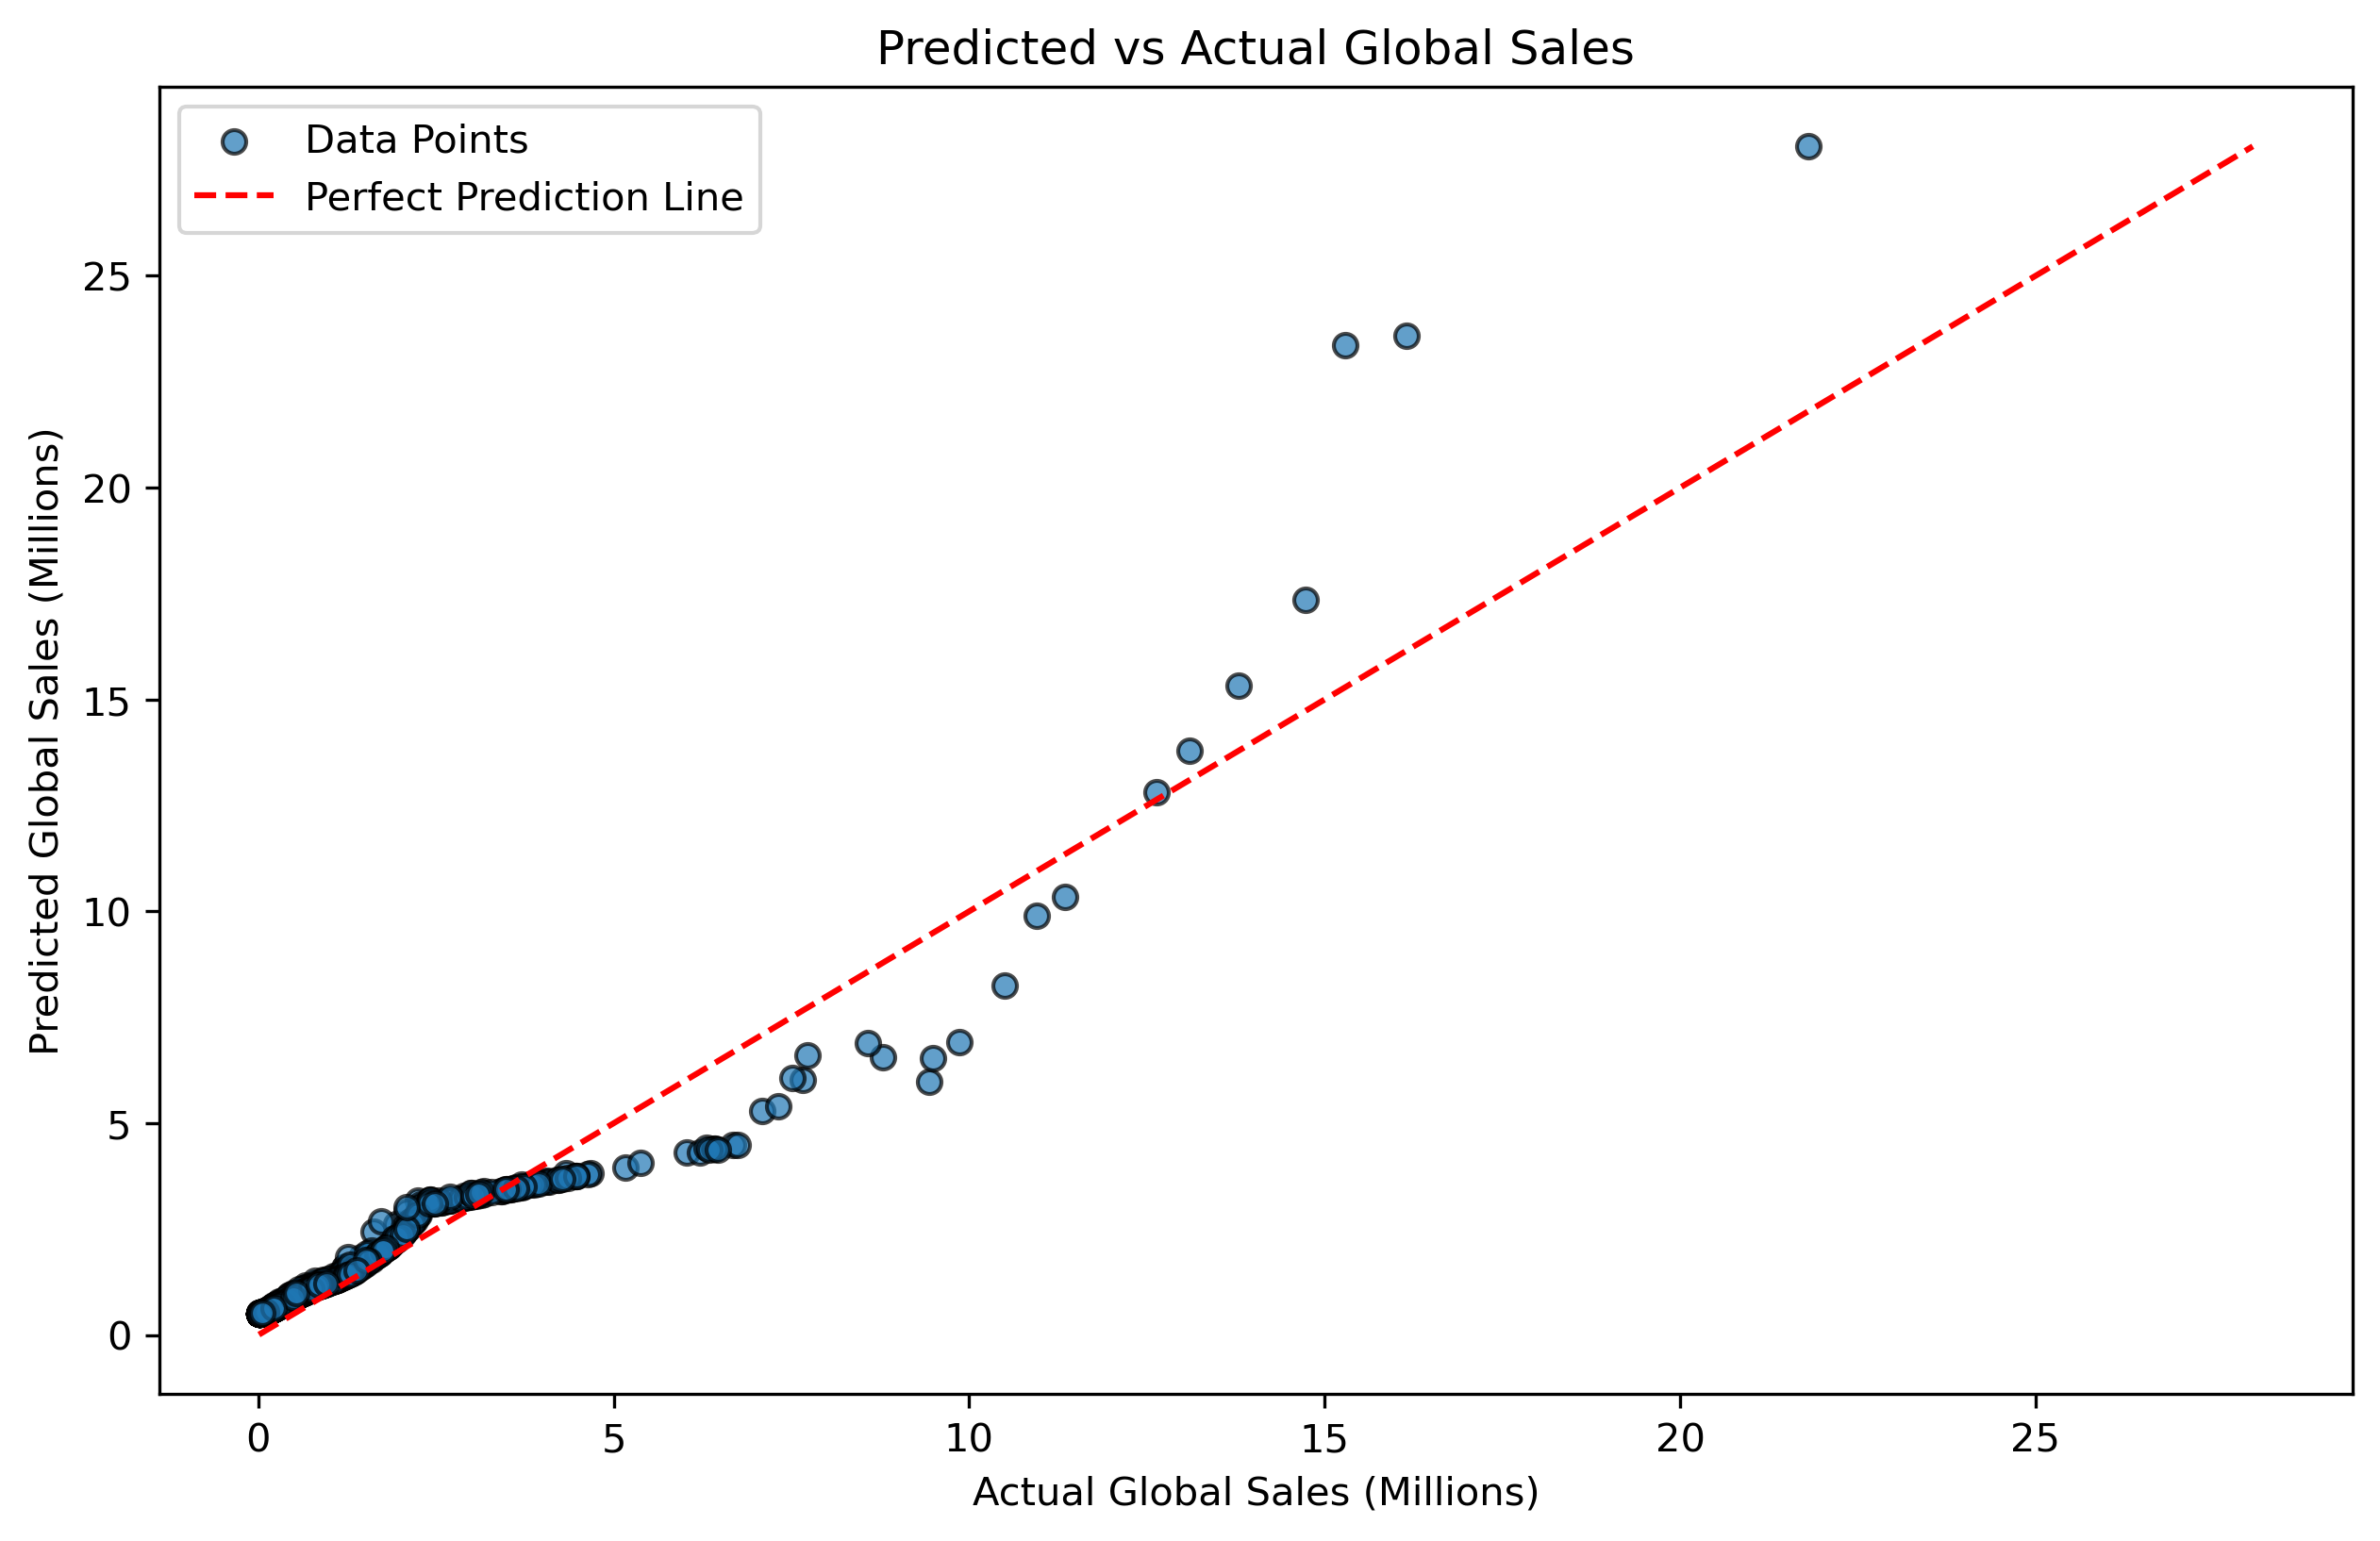

In [112]:
# define a function that takes two arguments actual vs predicted

def plot_predicted_vs_actual(y_test, y_pred, title="Predicted vs Actual Global Sales"):
    """
    Plot the predicted vs. actual values of the target variable.

    Parameters:
    - y_test (array-like): Actual values of the target variable.
    - y_pred (array-like): Predicted values of the target variable.
    - title (str): Title of the plot.
    """
    # Start by creating a figure
    plt.figure(figsize=(10, 6), dpi=300)

    # Creating a scatterplot comparing the predicted and actual values
    plt.scatter(y_test, y_pred2, alpha=0.7, edgecolor='k', label="Data Points")

    # Adding a straight diagonal line to the plot
    min_val = min(min(y_test), min(y_pred2))
    max_val = max(max(y_test), max(y_pred2))
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="Perfect Prediction Line")

    # Label both axes
    plt.xlabel("Actual Global Sales (Millions)")
    plt.ylabel("Predicted Global Sales (Millions)")
    plt.title(title)

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

# Call the function to plot
plot_predicted_vs_actual(y_test, y_pred2)

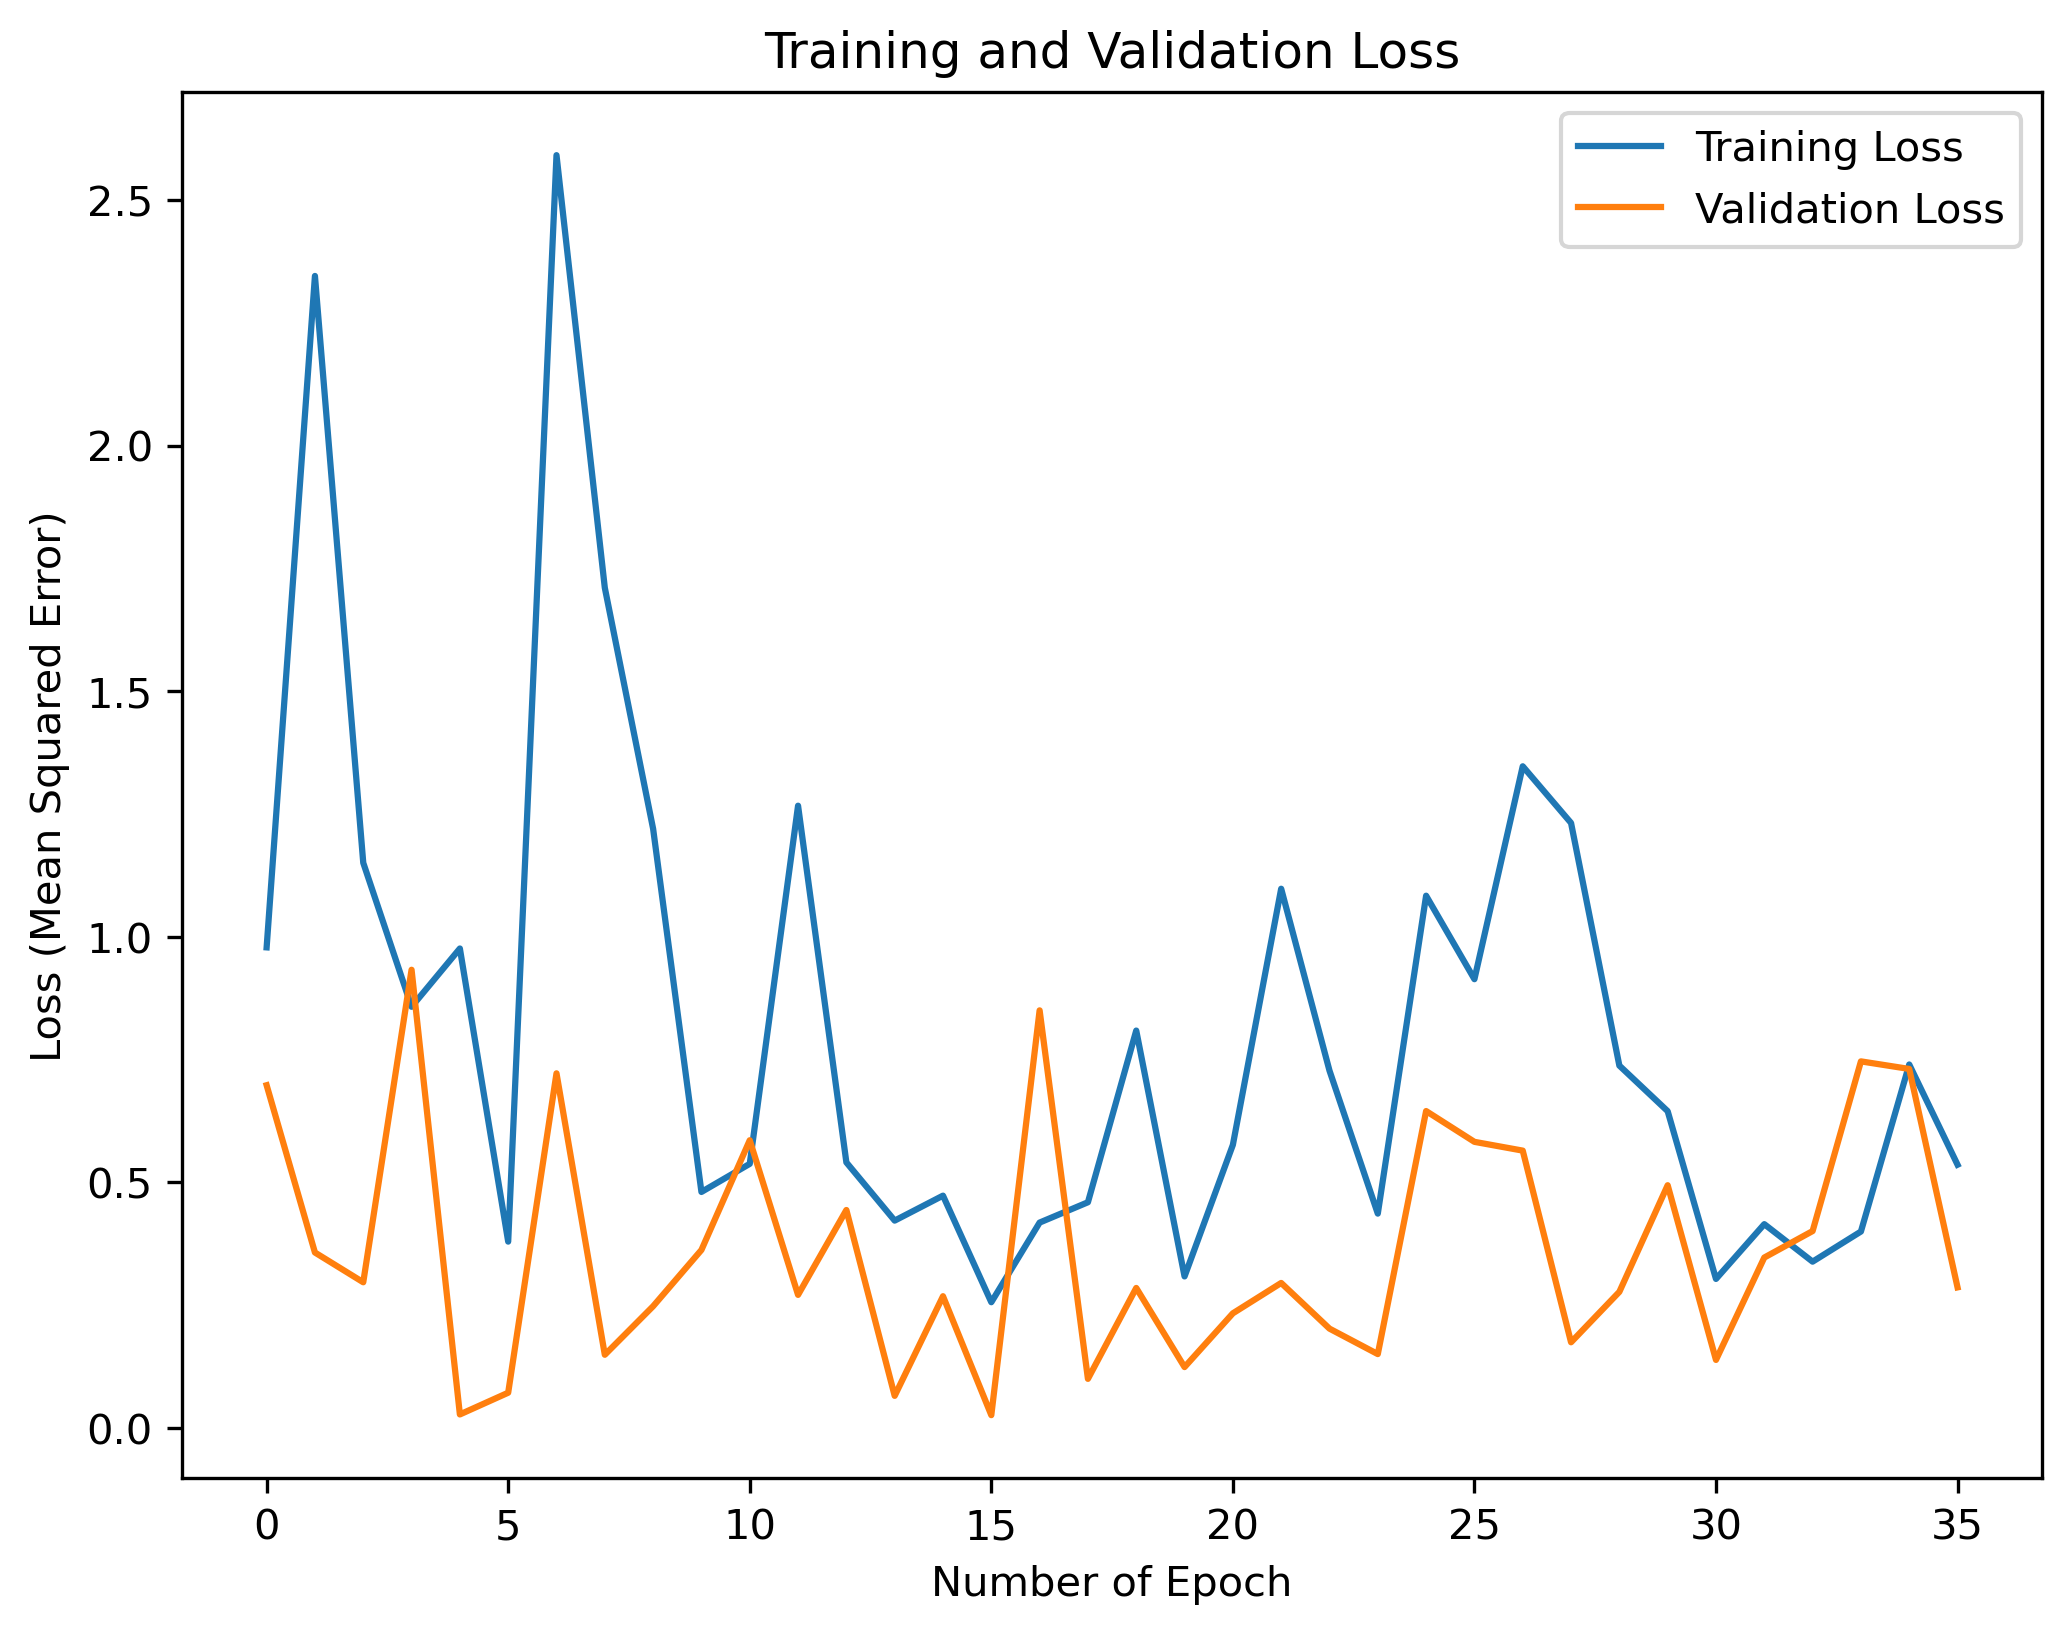

In [114]:
# define a function that taks the model training history and title of the plot

def plot_training_history(history, title="Training and Validation Loss"):
    """
    Plot the training and validation loss history from a Keras model.

    Parameters:
    - history: Keras History object after fitting a model.
    - title (str): Title of the plot.
    """
    # Convert the history object to a DataFrame
    history_df2 = pd.DataFrame(history2.history)

    # Create a matplotlib figure
    plt.figure(figsize=(8, 6), dpi=300)

    # Plot the training and validation loss
    plt.plot(history_df2["loss"], label="Training Loss")
    plt.plot(history_df2["val_loss"], label="Validation Loss")

    # Add a legend
    plt.legend()

    # Label both axes
    plt.xlabel("Number of Epoch")
    plt.ylabel("Loss (Mean Squared Error)")
    plt.title(title)

    # Show the plot
    plt.show()

# Call the function to plot
plot_training_history(history2)


# Artificial Neural Network Model 3

## Constructor Stage
- One input kayer with ReLU
- First hidden with dropout of 10%
- Second hidden layer
- Outer Layer with Linear activation function

In [115]:
# use a function to build the ANN architecture

def build_ann(input_dim):
    """
    Build an Artificial Neural Network (ANN) model.

    Parameters:
    - input_dim (int): The number of input features.

    Returns:
    - model (Sequential): A compiled ANN model.
    """
    # Initialize the ANN model
    model = Sequential()
    
    # Input layer
    model.add(Dense(units=64, input_dim=input_dim, activation="relu"))
    
    # First hidden layer
    model.add(Dense(units=64, activation="relu"))
    
    # Dropout layer to reduce overfitting
    model.add(Dropout(0.1))
    
    # Second hidden layer
    model.add(Dense(units=64, activation="relu"))
    
    # Output layer
    model.add(Dense(units=1, activation="linear")) # linear activation function
    
    return model

ann_model3 = build_ann(4)

# summary of model
ann_model3.summary()

C:\Users\hp\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,705 (34.00 KB)

 Trainable params: 8,705 (34.00 KB)

 Non-trainable params: 0 (0.00 B)

## Compilation Stage
- Adam Optimizer with default learning rate of 0.001
- Loss function is Mean Square Error
- Metrics is Mean Square Error


In [116]:
#compile the second ANN model
ann_model3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

## Training Stage
- Train the model for 200 epochs
- Introduce Early stopping
- Monitor Validation loss and set patience to 20.


In [117]:
# import earlystopping from Keras
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

# fit the model with early stopping
history3 = ann_model3.fit(x=x_train_scaled, y=y_train, batch_size=None, epochs=200, verbose='auto', validation_split=0.1, callbacks=[early_stopping])

Epoch 1/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 1.9891 - mean_squared_error: 1.9891 - val_loss: 0.4190 - val_mean_squared_error: 0.4190
Epoch 2/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2553 - mean_squared_error: 0.2553 - val_loss: 0.1280 - val_mean_squared_error: 0.1280
Epoch 3/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1934 - mean_squared_error: 0.1934 - val_loss: 0.0351 - val_mean_squared_error: 0.0351
Epoch 4/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0534 - mean_squared_error: 0.0534 - val_loss: 0.0175 - val_mean_squared_error: 0.0175
Epoch 5/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0395 - mean_squared_error: 0.0395 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 6/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0204 - mean_squared_error: 0.0204 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 7/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0586 - mean_squared_error: 0.0586 - val_los

## Evaluate Stage
- Fit the trained model to the scaled test data
- Use a plot to visualise the results the model predicts


In [122]:
# Predict model output using scaled test data
y_pred3 = ann_model3.predict(x_test_scaled)

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [119]:
#examine the predicted values
print(y_pred3)

[[6.051594  ]
 [0.47457427]
 [0.27326238]
 ...
 [0.26903257]
 [0.10096734]
 [1.0402783 ]]


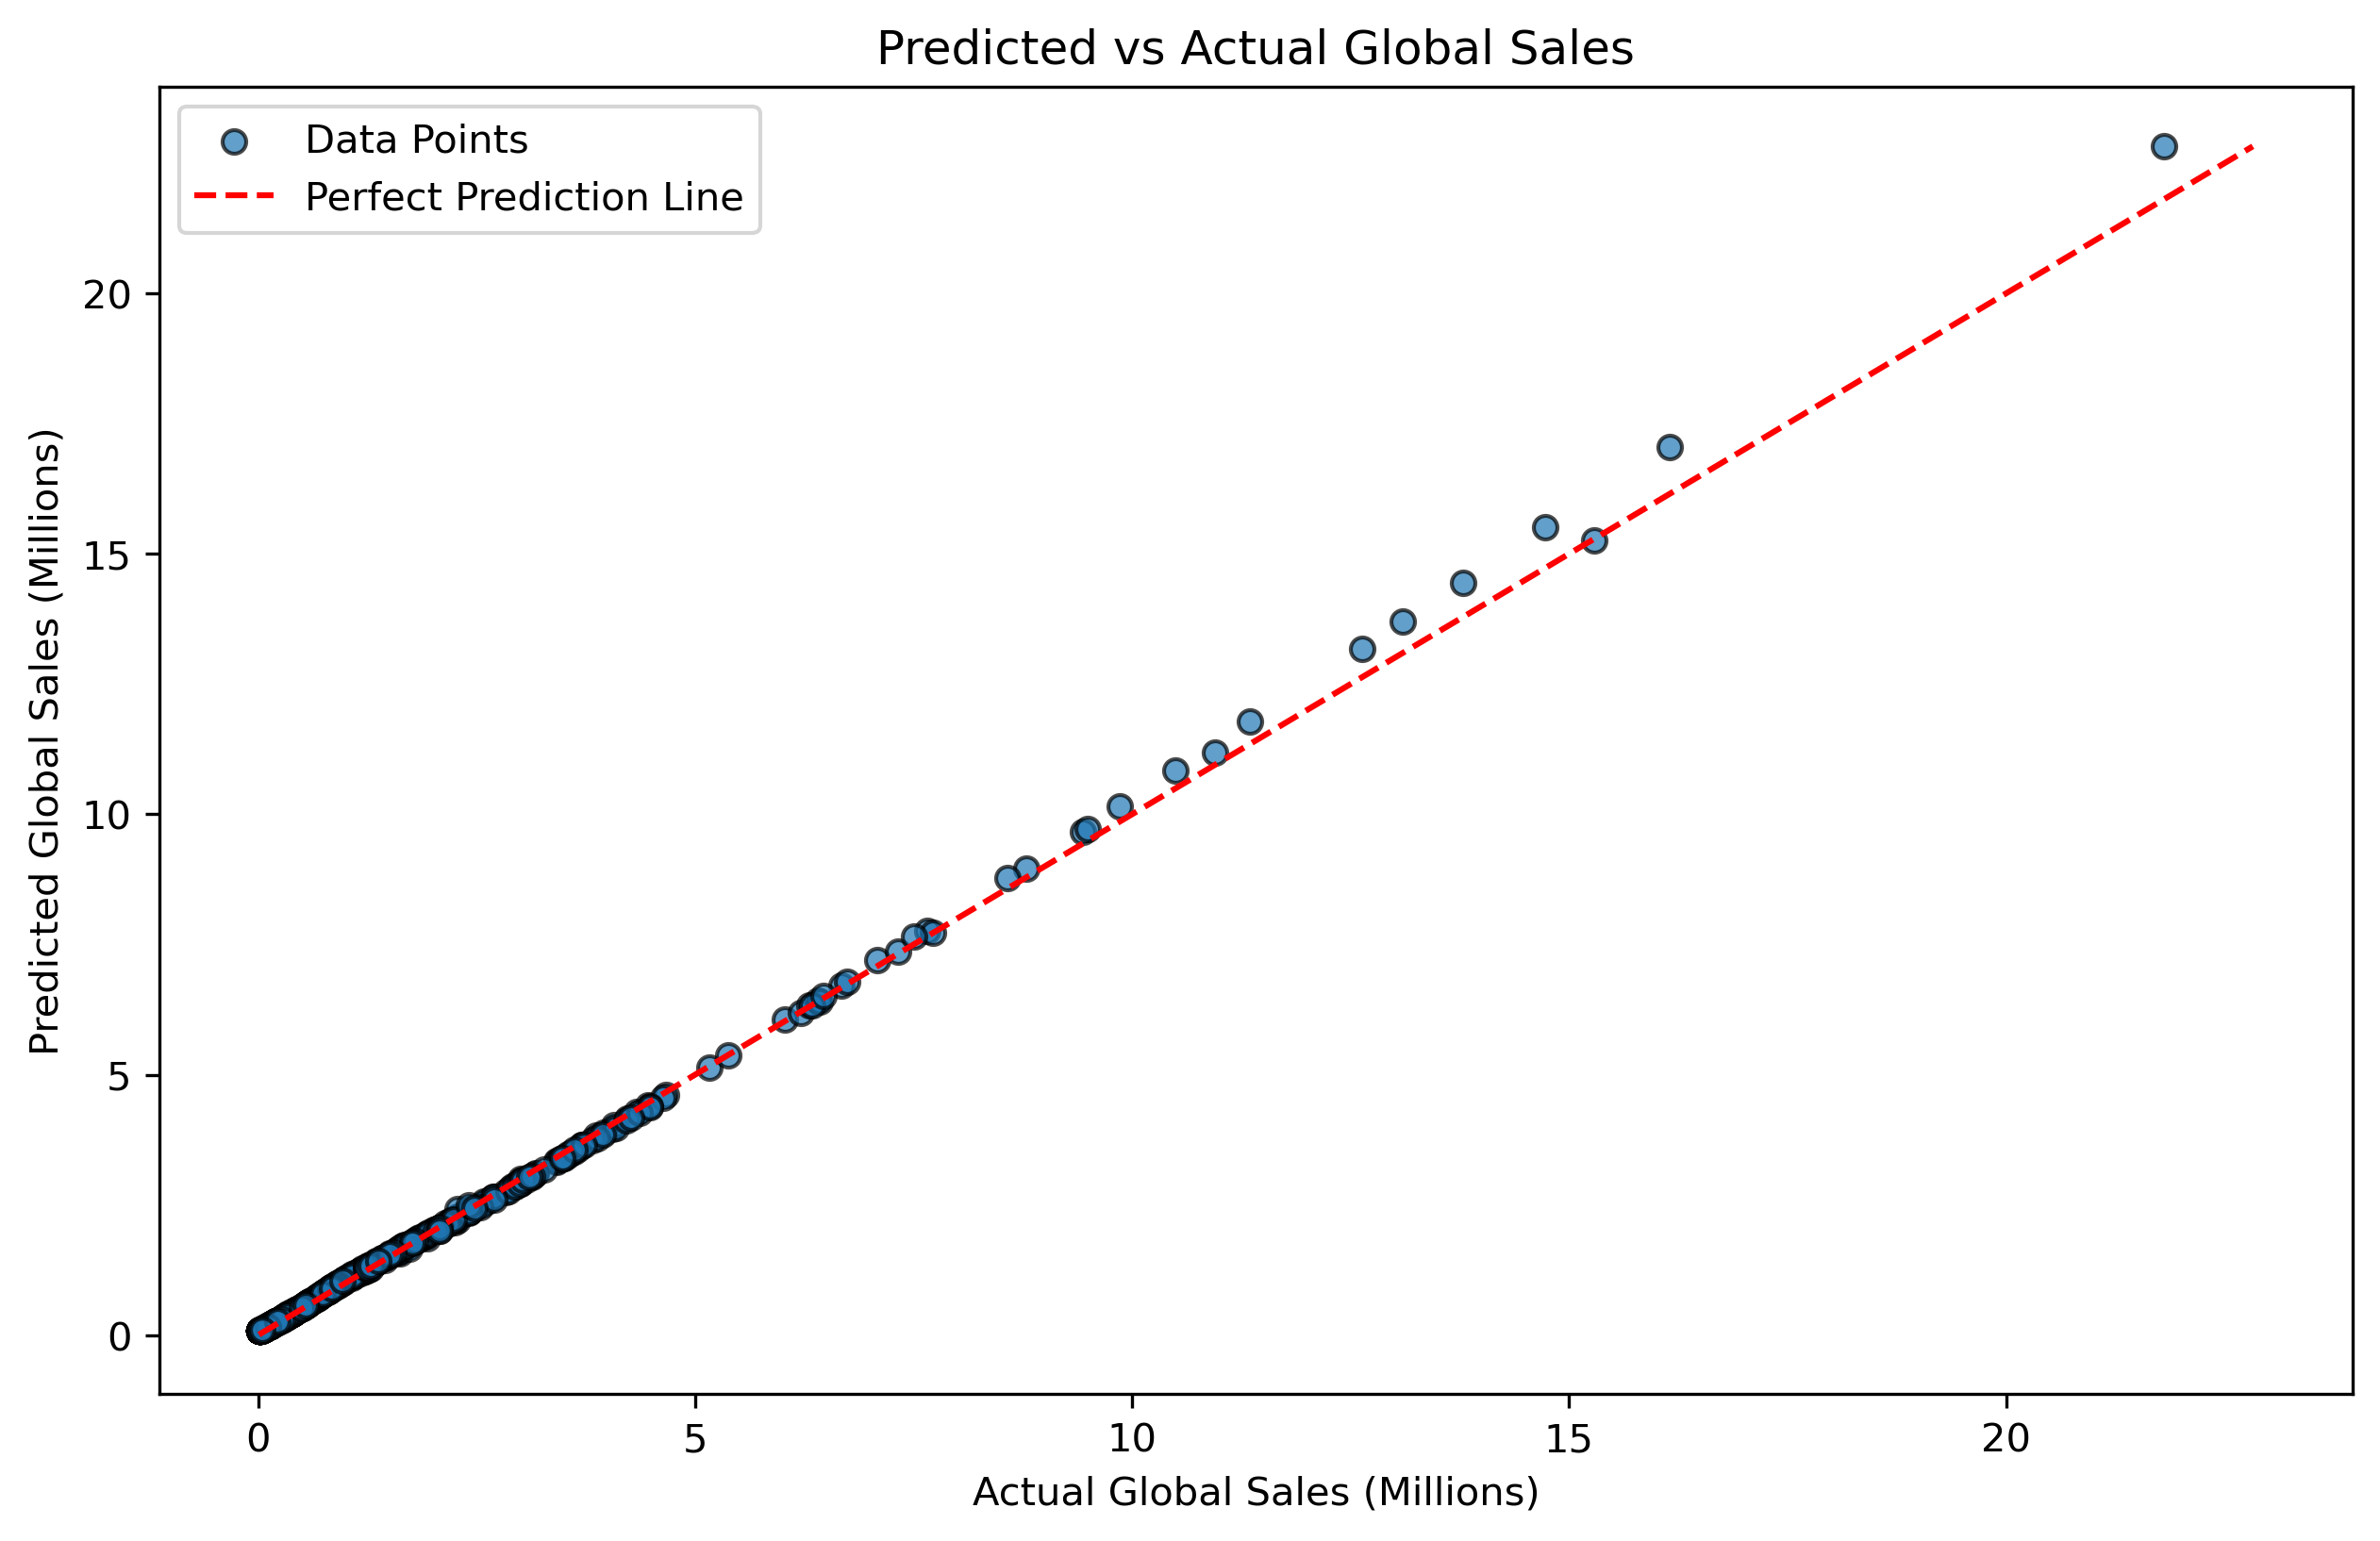

In [138]:
# define a function that takes two arguments actual vs predicted

def plot_predicted_vs_actual(y_test, y_pred, title="Predicted vs Actual Global Sales"):
    """
    Plot the predicted vs. actual values of the target variable.

    Parameters:
    - y_test (array-like): Actual values of the target variable.
    - y_pred (array-like): Predicted values of the target variable.
    - title (str): Title of the plot.
    """
    # Start by creating a figure
    plt.figure(figsize=(10, 6), dpi=300)

    # Creating a scatterplot comparing the predicted and actual values
    plt.scatter(y_test, y_pred3, alpha=0.7, edgecolor='k', label="Data Points")

    # Adding a straight diagonal line to the plot
    min_val = min(min(y_test), min(y_pred3))
    max_val = max(max(y_test), max(y_pred3))
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="Perfect Prediction Line")

    # Label both axes
    plt.xlabel("Actual Global Sales (Millions)")
    plt.ylabel("Predicted Global Sales (Millions)")
    plt.title(title)

    # Add legend
    plt.legend()
    plt.savefig('./model3img')
    # Show the plot
    plt.show()

# Call the function to plot
plot_predicted_vs_actual(y_test, y_pred3)


### Plotting Training and Validation Loss

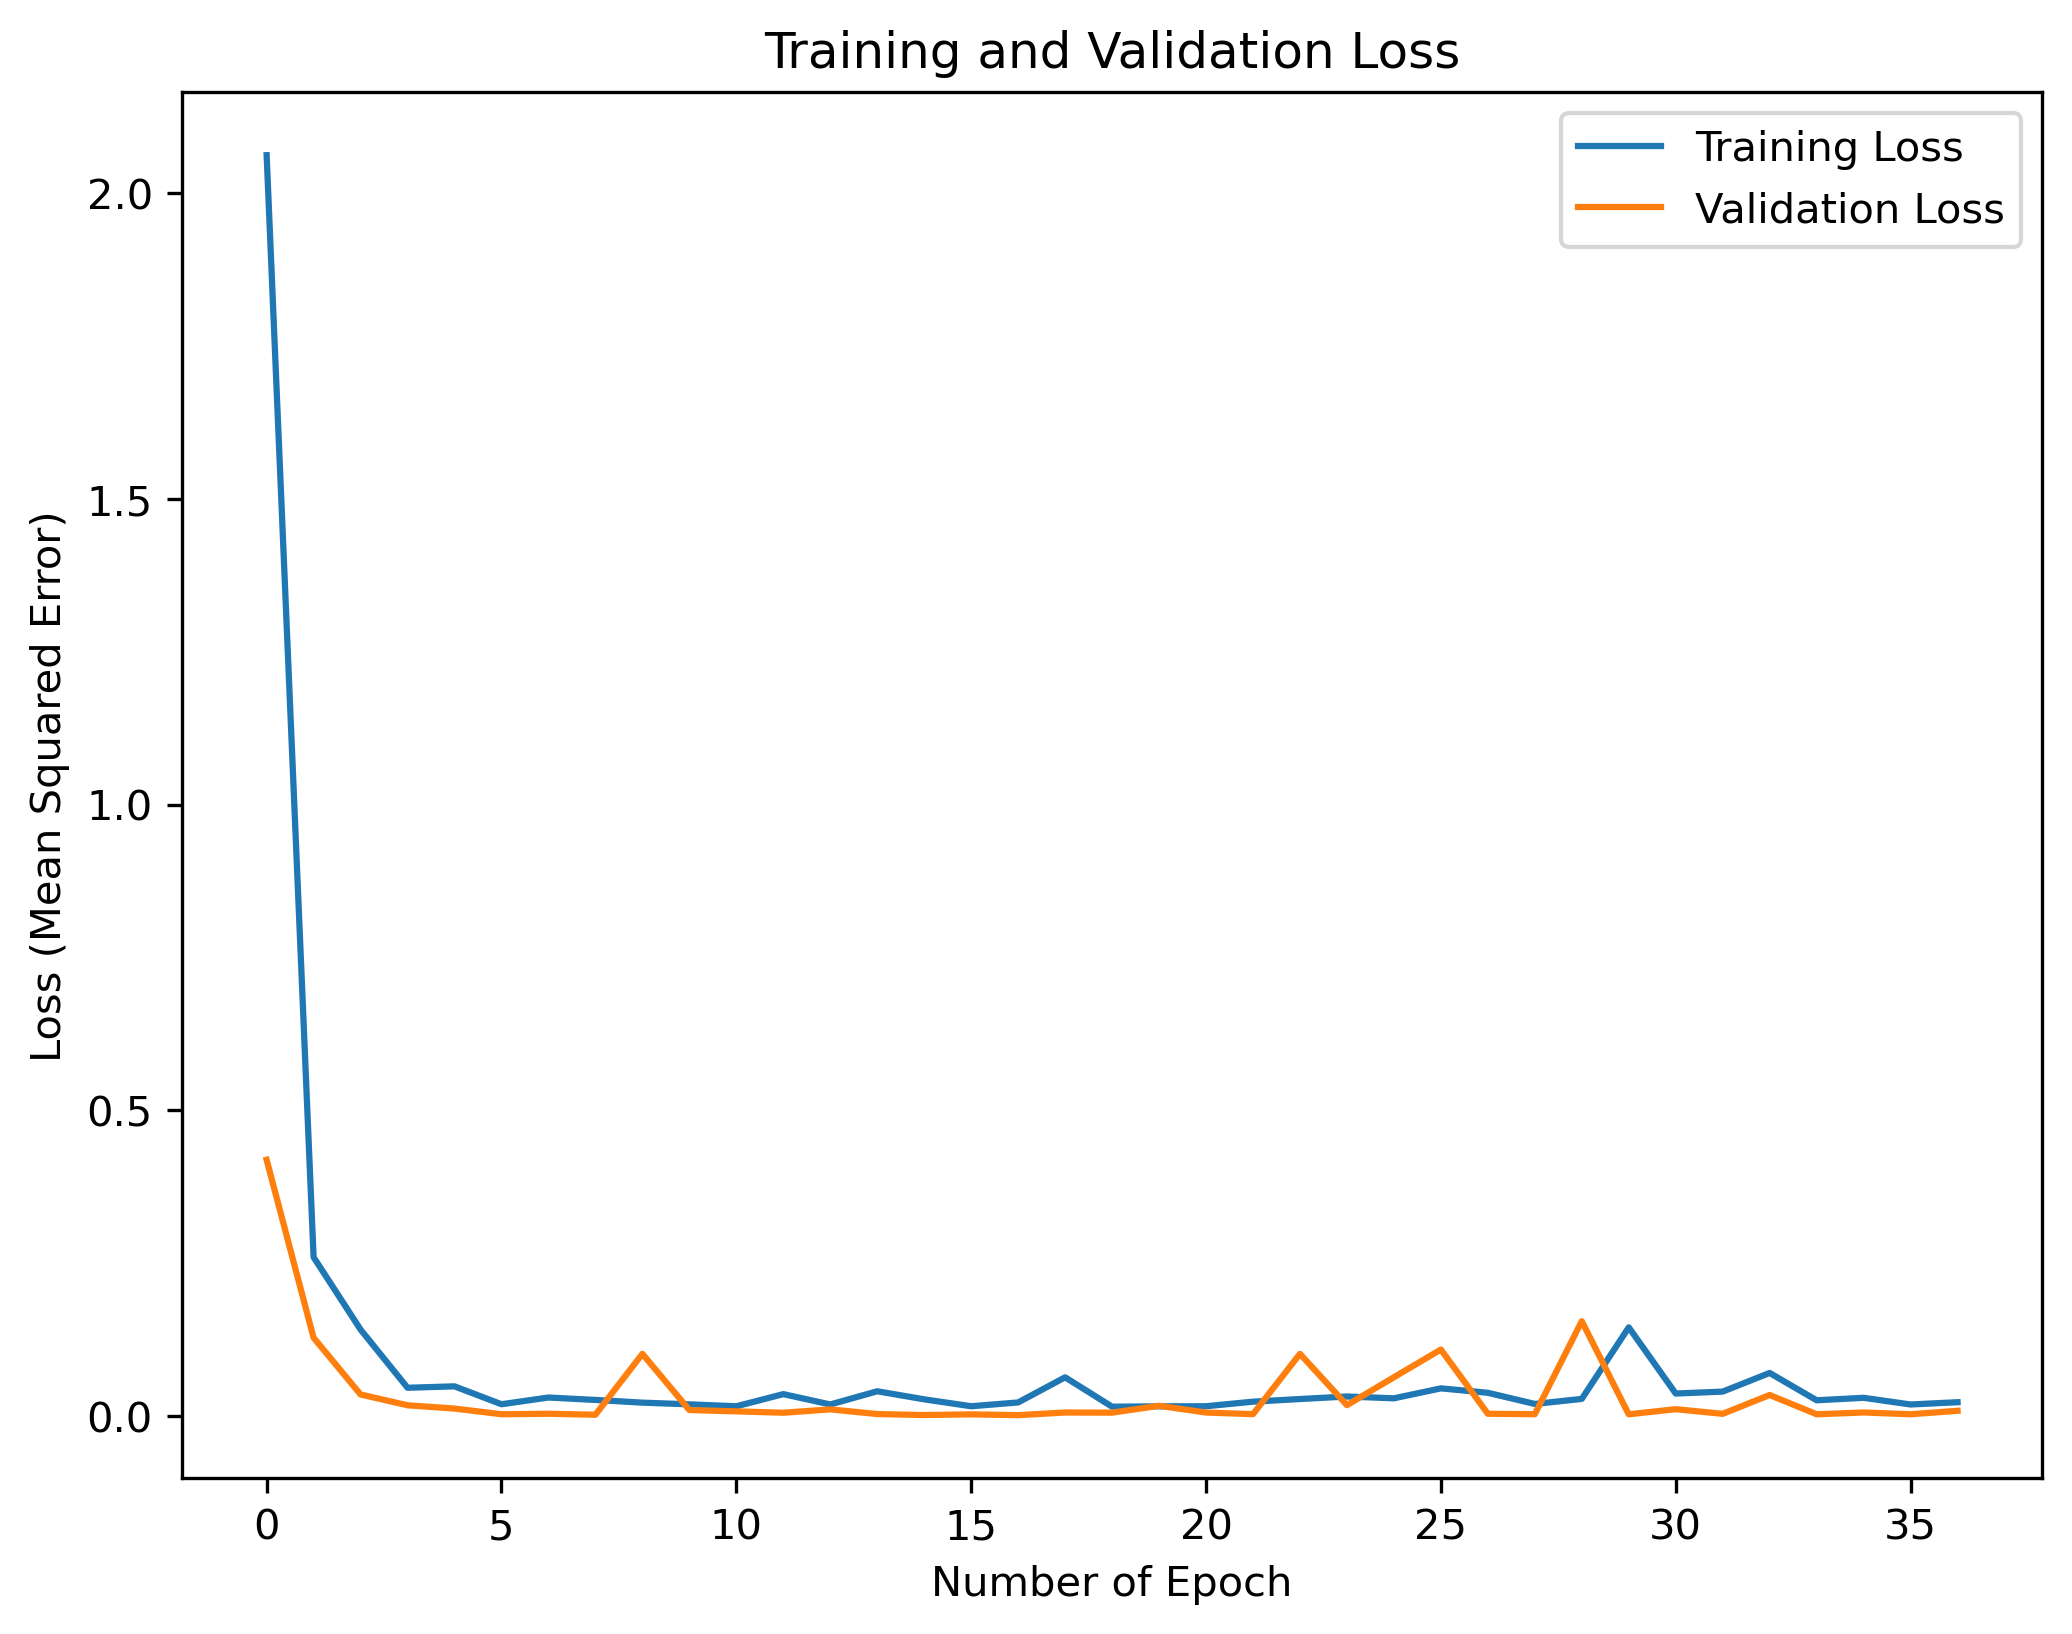

In [121]:
# define a function that taks the model training history and title of the plot

def plot_training_history(history, title="Training and Validation Loss"):
    """
    Plot the training and validation loss history from a Keras model.

    Parameters:
    - history: Keras History object after fitting a model.
    - title (str): Title of the plot.
    """
    # Convert the history object to a DataFrame
    history_df3 = pd.DataFrame(history3.history)

    # Create a matplotlib figure
    plt.figure(figsize=(8, 6), dpi=300)

    # Plot the training and validation loss
    plt.plot(history_df3["loss"], label="Training Loss")
    plt.plot(history_df3["val_loss"], label="Validation Loss")

    # Add a legend
    plt.legend()

    # Label both axes
    plt.xlabel("Number of Epoch")
    plt.ylabel("Loss (Mean Squared Error)")
    plt.title(title)

    # Show the plot
    plt.show()

# Call the function to plot
plot_training_history(history3)


## Artificial Neural Network Model 4
- Combining categorical and numerical features



### Feature Extraction
- Use Genre as the only categorical feature

In [123]:
# extract the numerical features
numeric_features = clean_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y = clean_df['Global_Sales'] # target variable

In [124]:
# Scale the numerical features 
scale = MinMaxScaler()
scale.fit(numeric_features)
x_numerical_scaled = scale.transform(numeric_features)

In [125]:
# use Genre as categorical feature
categorical_feature = clean_df[['Genre']]

In [126]:
# use LabelEncoder class from sklearn to apply label encoding to categorical features
from sklearn.preprocessing import LabelEncoder

In [127]:
# instantitate label encoder class
label = LabelEncoder()

In [128]:
# fit categorical variable into label encoder 
label.fit(categorical_feature)
x_categorical_label = label.transform(categorical_feature)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [129]:
# re-shape the x_cat_label array to make it a 2-D array.
x_categorical_label = x_categorical_label.reshape(-1, 1)


# concatenate the numerical and categorical input features into a single array.
x1= np.concatenate((x_numerical_scaled, x_categorical_label), axis = 1)

In [130]:
# Split into taining and test sets
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size = 0.2, random_state = 42)

In [131]:
# print the shape of training and test sets
print(x_train.shape)
print(y_train.shape)

(5460, 5)
(5460,)


## Constructor Stage
- Instantiate Sequential
- Input shape will be 5 according to the number of inout features
- One input layer with 64 units plus ReLU
- Dropout of 10%
- second hidden layer 
- Third hidden layer with a dropout of 10%

In [132]:
# Create an instance of the Sequential class.
# This will be our model.
ann_model4 = Sequential()

# first hidden layer, with input dimension of 5 and ReLU 
ann_model4.add(Input(shape=(5,)))
ann_model4.add(Dense(units = 64, activation = "relu"))
ann_model4.add(Dropout(0.1)) #10% dropout rate

# Second hidden layer with 64 units  with ReLU activation function.
ann_model4.add(Dense(units = 64, activation = "relu"))

# Third hidden layer with 64 units with ReLU activation function.
ann_model4.add(Dense(units = 64, activation = "relu"))
ann_model4.add(Dropout(0.1)) #10% dropout rate

# out layer
ann_model4.add(Dense(units = 1, activation = "linear")) # linear activation function since a regression task (continuous)


# Print a summary of the model
ann_model4.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 64)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,769 (34.25 KB)

 Trainable params: 8,769 (34.25 KB)

 Non-trainable params: 0 (0.00 B)

## Compilation Stage
- Compile with Adam Optimizer and Mean Square error as loss function


In [133]:
# Compile the model, using the default Adam optimizer
ann_model4.compile(optimizer="adam", loss='mean_squared_error', metrics= ['mean_squared_error'])

Train the model
- Train the model for 100 epochs
- Apply early stopping criterion with a patience of 20 and monitor validation loss

In [134]:
# apply early stopping criterion with a patience of 20 and monitor validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)
# Train the model
history4 = ann_model4.fit(x = x_train, y = y_train, batch_size = None, epochs = 200,
verbose = "auto", validation_split = 0.1, callbacks = [early_stopping])

Epoch 1/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 3.2932 - mean_squared_error: 3.2932 - val_loss: 2.8733 - val_mean_squared_error: 2.8733
Epoch 2/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.1413 - mean_squared_error: 3.1413 - val_loss: 1.7914 - val_mean_squared_error: 1.7914
Epoch 3/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.3307 - mean_squared_error: 2.3307 - val_loss: 0.7940 - val_mean_squared_error: 0.7940
Epoch 4/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.8954 - mean_squared_error: 0.8954 - val_loss: 0.4543 - val_mean_squared_error: 0.4543
Epoch 5/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.6094 - mean_squared_error: 0.6094 - val_loss: 0.3309 - val_mean_squared_error: 0.3309
Epoch 6/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.5361 - mean_squared_error: 0.5361 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 7/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2944 - mean_squared_error: 0.2944 - val_los

154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0768 - mean_squared_error: 0.0768 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 46/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0726 - mean_squared_error: 0.0726 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 47/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0973 - mean_squared_error: 0.0973 - val_loss: 0.0513 - val_mean_squared_error: 0.0513


In [135]:
ypred4 = ann_model4.predict(x_test)

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


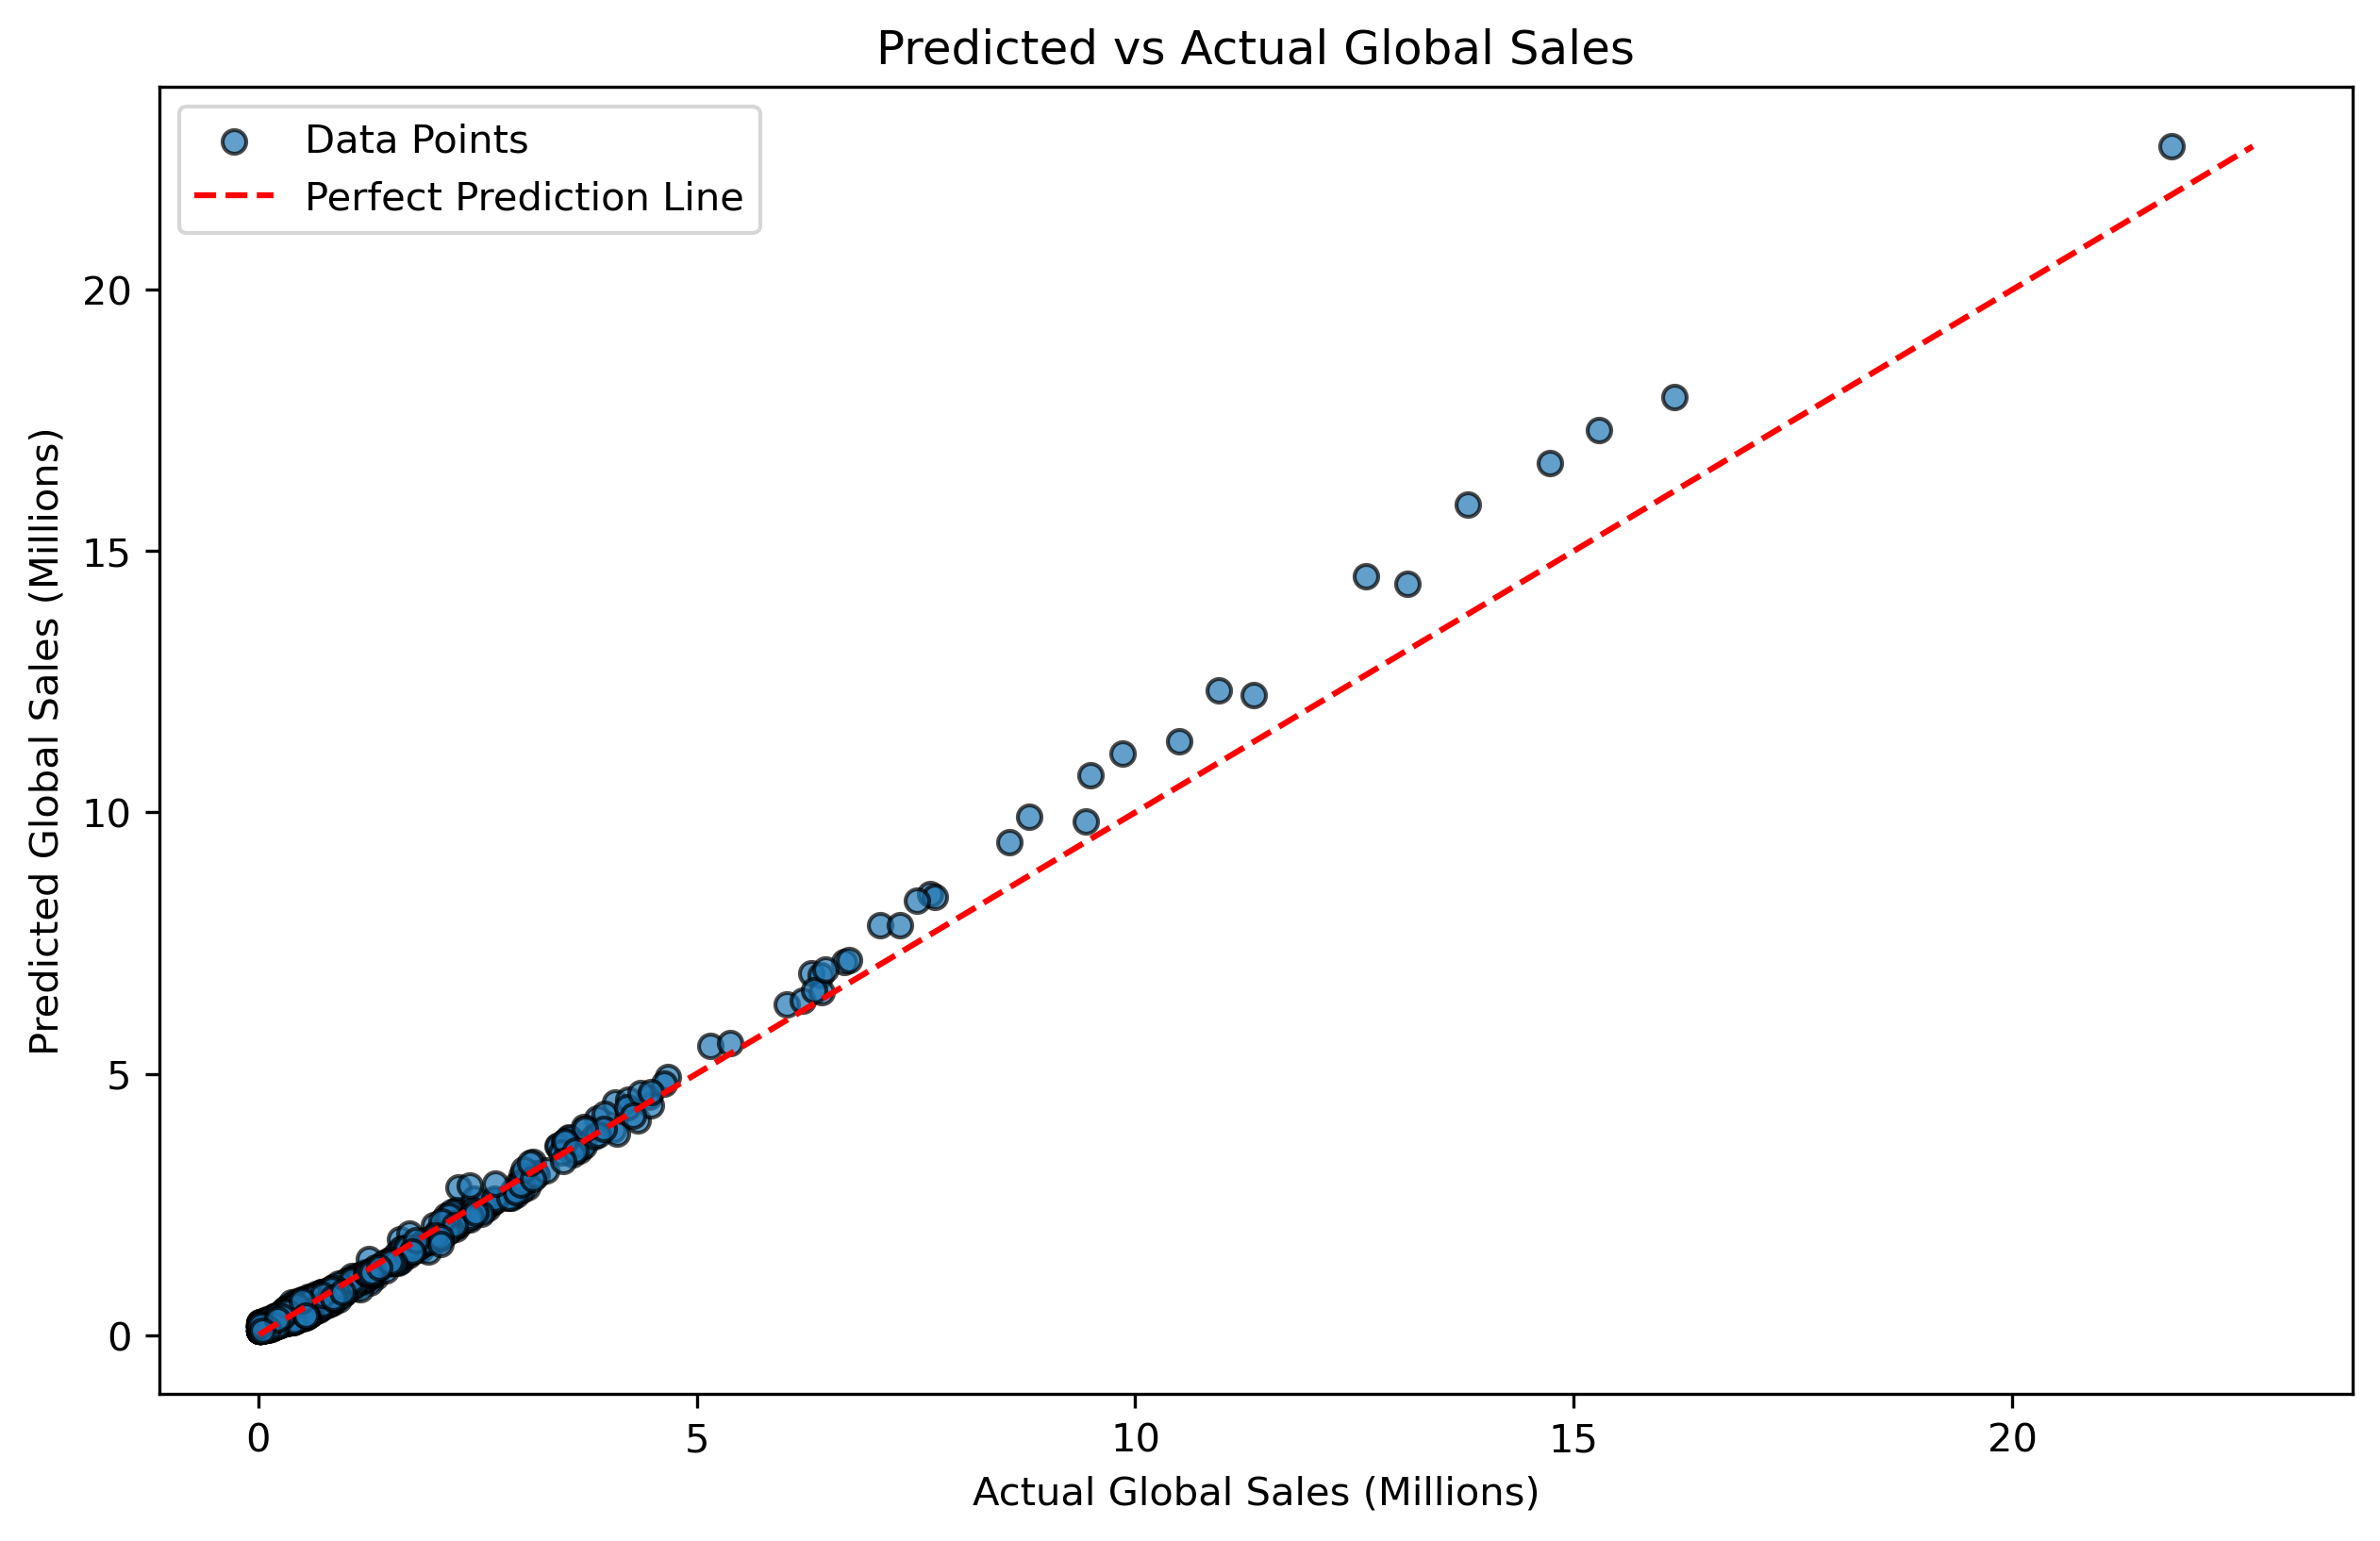

In [136]:
# define a function that takes two arguments actual vs predicted

def plot_predicted_vs_actual(y_test, y_pred, title="Predicted vs Actual Global Sales"):
    """
    Plot the predicted vs. actual values of the target variable.

    Parameters:
    - y_test (array-like): Actual values of the target variable.
    - y_pred (array-like): Predicted values of the target variable.
    - title (str): Title of the plot.
    """
    # Start by creating a figure
    plt.figure(figsize=(10, 6), dpi=300)

    # Creating a scatterplot comparing the predicted and actual values
    plt.scatter(y_test, ypred4, alpha=0.7, edgecolor='k', label="Data Points")

    # Adding a straight diagonal line to the plot
    min_val = min(min(y_test), min(ypred4))
    max_val = max(max(y_test), max(ypred4))
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="Perfect Prediction Line")

    # Label both axes
    plt.xlabel("Actual Global Sales (Millions)")
    plt.ylabel("Predicted Global Sales (Millions)")
    plt.title(title)

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

# Call the function to plot
plot_predicted_vs_actual(y_test, ypred4)


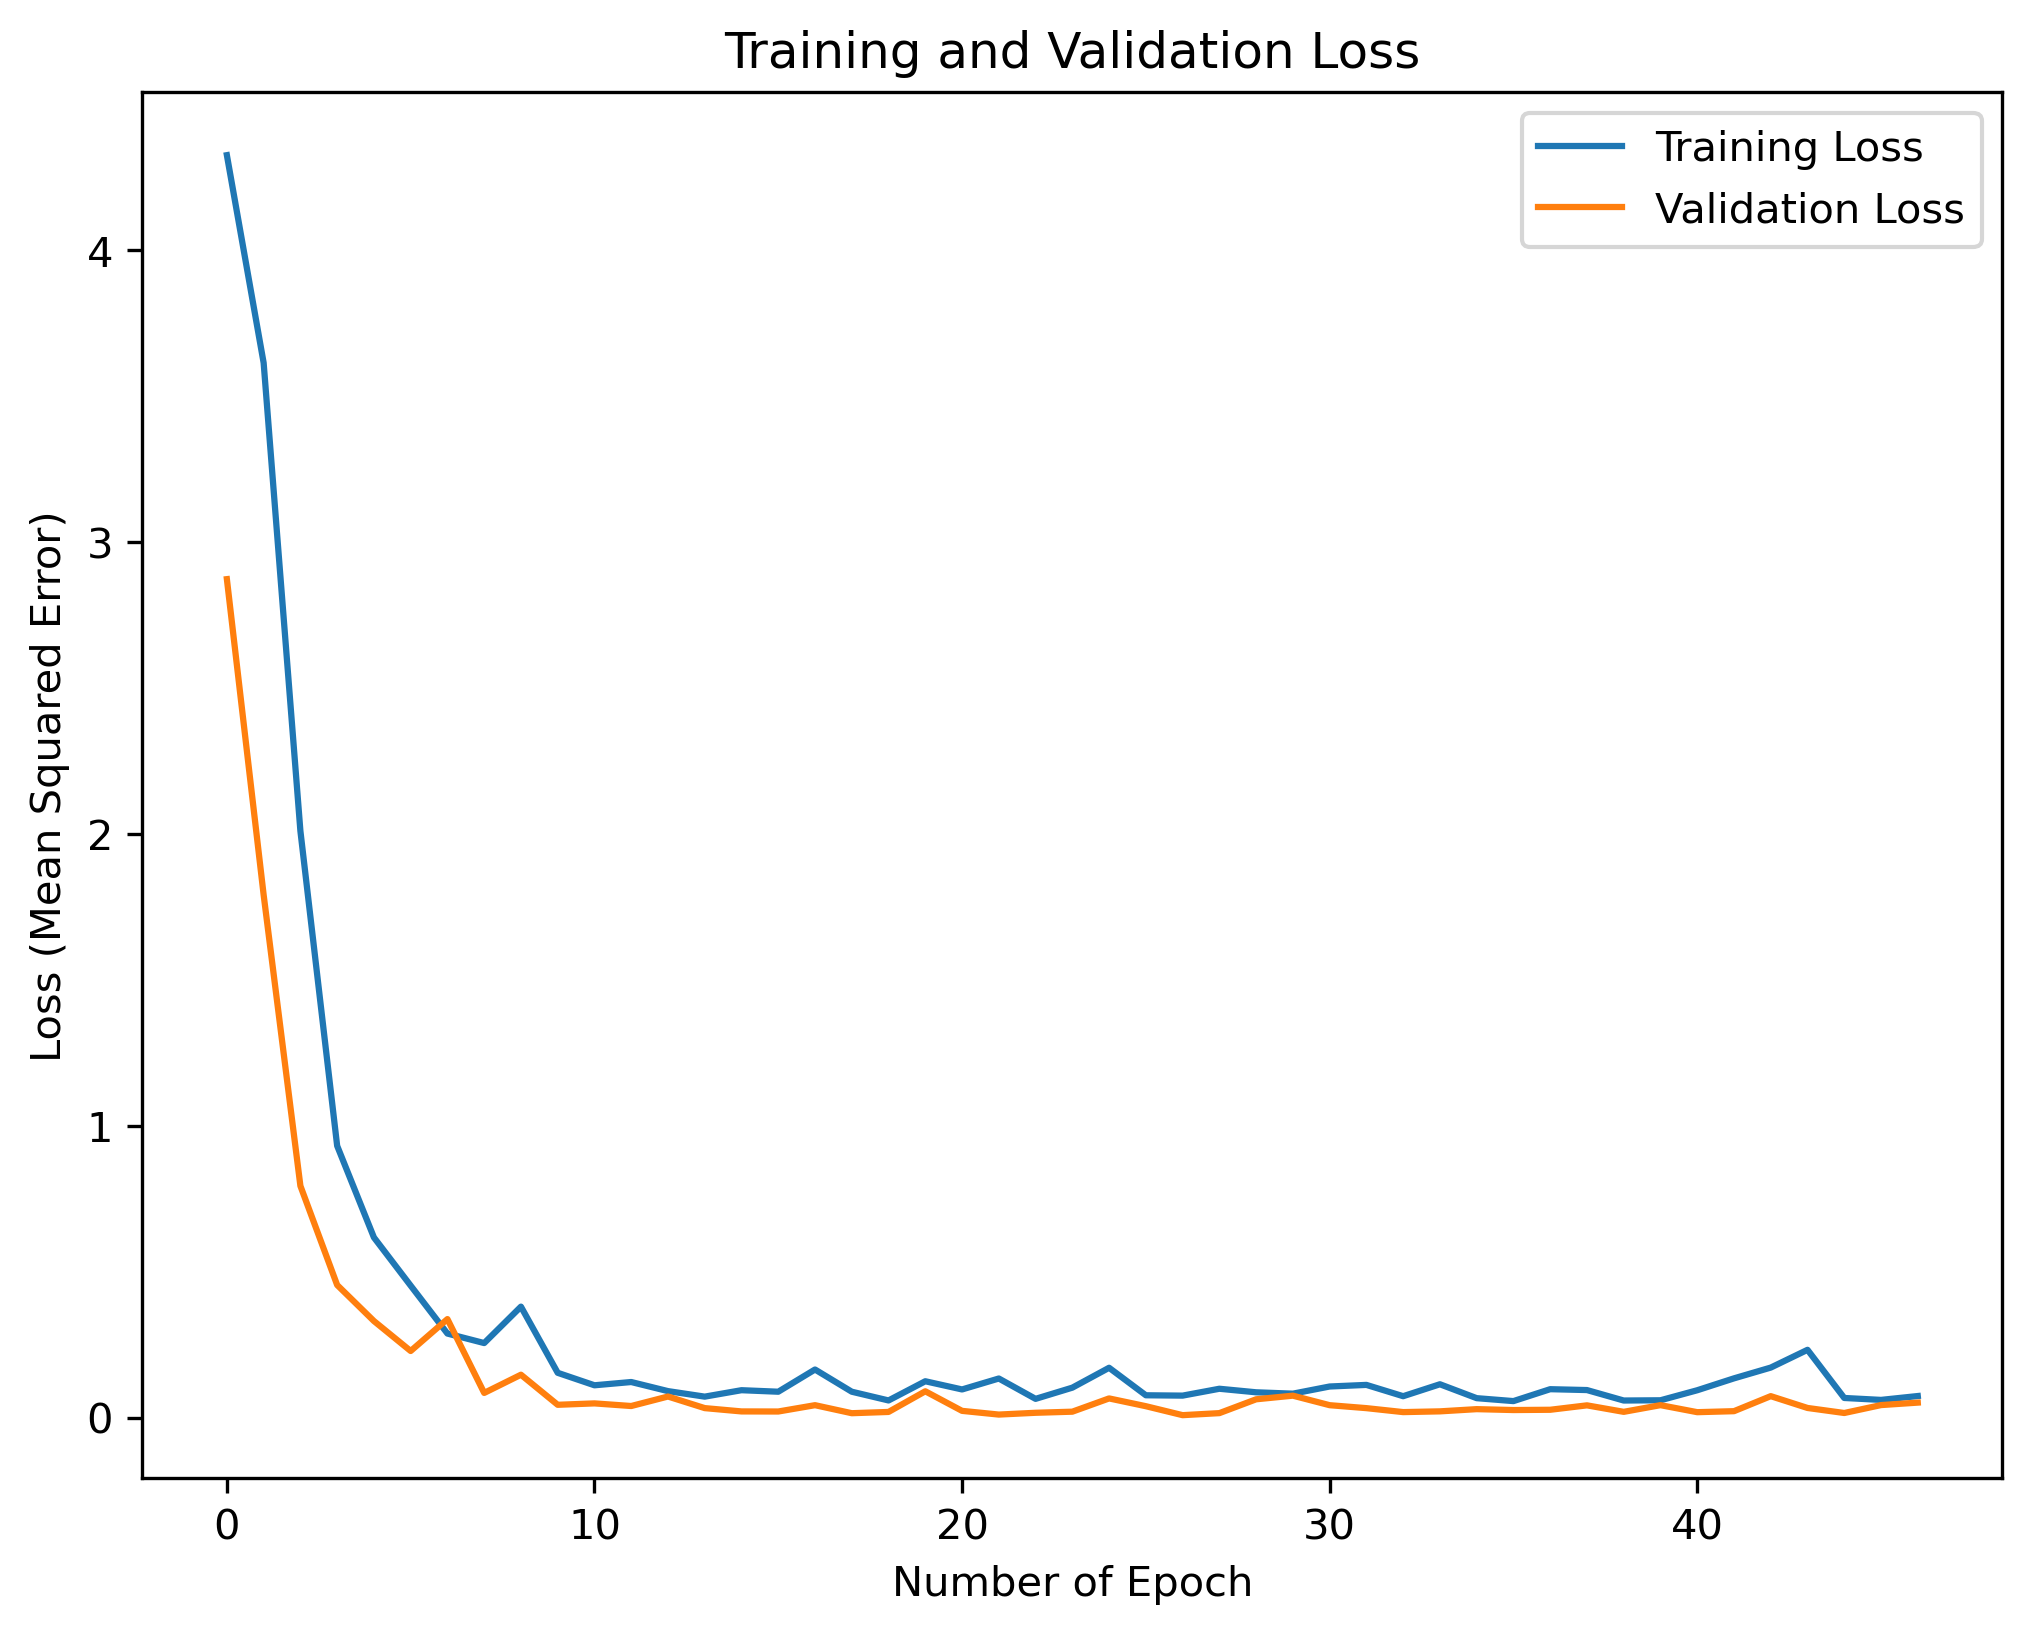

In [137]:
# define a function that taks the model training history and title of the plot

def plot_training_history(history, title="Training and Validation Loss"):
    """
    Plot the training and validation loss history from a Keras model.

    Parameters:
    - history: Keras History object after fitting a model.
    - title (str): Title of the plot.
    """
    # Convert the history object to a DataFrame
    history_df4 = pd.DataFrame(history4.history)

    # Create a matplotlib figure
    plt.figure(figsize=(8, 6), dpi=300)

    # Plot the training and validation loss
    plt.plot(history_df4["loss"], label="Training Loss")
    plt.plot(history_df4["val_loss"], label="Validation Loss")

    # Add a legend
    plt.legend()

    # Label both axes
    plt.xlabel("Number of Epoch")
    plt.ylabel("Loss (Mean Squared Error)")
    plt.title(title)

    # Show the plot
    plt.show()

# Call the function to plot
plot_training_history(history4)


# Task F. 
- Use the k-Means clustering algorithm to identify clusters in the video games’ sales
data. Consider different combinations of the numerical variables in the dataset to use
as input features for the clustering algorithm. In each case, what is the optimal number
of clusters (k) to use and why? Which combination of variables produces the best
clustering results? Use appropriate evaluation metrics to support your conclusions.

## K-Means Clustering Algorithm
### Model 1

### Feature Extraction
- Extract dfferent input features from the cleaned video games data
- Global Sales, European Sales - First combination of numeric input eatures
- Global Sales and North America Sales - Second Combination of numeric input features

In [46]:
# extract the input features that we will be using for this model from the dataset.

feat = ['Global_Sales', 'EU_Sales']
num_feat = clean_df[feat]


In [47]:
# apply standardisation to re- scale the input features
from sklearn.preprocessing import StandardScaler # import standard scaler from sklearn

scale = StandardScaler() # instantiate a class of standard scaler
scale.fit(num_feat) # fit the numeric input features
x_scaled = scale.transform(num_feat) # transform the features


In [48]:
# rescale so they each have a mean of zero and a standard deviation of one.
scaler = StandardScaler()

x_scaled = scaler.fit_transform(num_feat)

In [49]:
print(x_scaled)
print(type(x_scaled)) # type of the scaled data
print(x_scaled.shape) #shape of the scaled data

[[41.6403271  41.79363059]
 [17.69593487 18.22243848]
 [16.29523122 15.55976677]
 ...
 [-0.39096937 -0.32896273]
 [-0.39096937 -0.34351284]
 [-0.39096937 -0.32896273]]
<class 'numpy.ndarray'>
(6825, 2)


## Building Clustering Algorithm
- Determine the ultimate number of clusters to use
- Use Elbow Method

In [50]:
## i=upgraded threadpoolct1 to version 3.1.0
pip install threadpoolctl==3.1.0 

^C
Note: you may need to restart the kernel to use updated packages.


In [53]:
# impot kmeans from sklearn
from sklearn.cluster import KMeans

In [52]:
# Train KMeans
kmeans = KMeans(n_clusters=2, random_state=50, verbose=1)
kmeans.fit(x_scaled)
print("Inertia:", kmeans.inertia_)

Initialization complete
Iteration 0, inertia 8900.94417255951.
Iteration 1, inertia 8222.535211205077.
Iteration 2, inertia 8199.262685314356.
Iteration 3, inertia 8079.470942873698.
Iteration 4, inertia 7908.732489402381.
Iteration 5, inertia 7719.845258262147.
Iteration 6, inertia 7571.64940045533.
Iteration 7, inertia 7469.9432652400355.
Iteration 8, inertia 7396.317856810084.
Iteration 9, inertia 7371.024860285426.
Iteration 10, inertia 7362.351701684577.
Iteration 11, inertia 7358.117457621766.
Iteration 12, inertia 7356.946359015115.
Iteration 13, inertia 7355.999155837242.
Iteration 14, inertia 7355.198297909346.
Iteration 15, inertia 7354.606183916632.
Iteration 16, inertia 7353.298566243721.
Iteration 17, inertia 7352.516157032871.
Iteration 18, inertia 7351.272551283194.
Iteration 19, inertia 7348.555609168525.
Iteration 20, inertia 7347.8037834215775.
Iteration 21, inertia 7347.373634639877.
Converged at iteration 21: strict convergence.
Inertia: 7347.373634639877


In [54]:
# Elbow Method to find the optimal number of clusters
k_values = range(1,11)
inertia_list = []

for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(x_scaled)
    inertia_list.append(kmeans_model.inertia_)

inertia_list

[13649.999999999995,
 7350.394320773333,
 4755.827699064051,
 2600.94250447165,
 1702.5109443615956,
 1607.0194026821064,
 1071.266136490965,
 804.7774870888903,
 724.2961972359283,
 676.2126786421645]

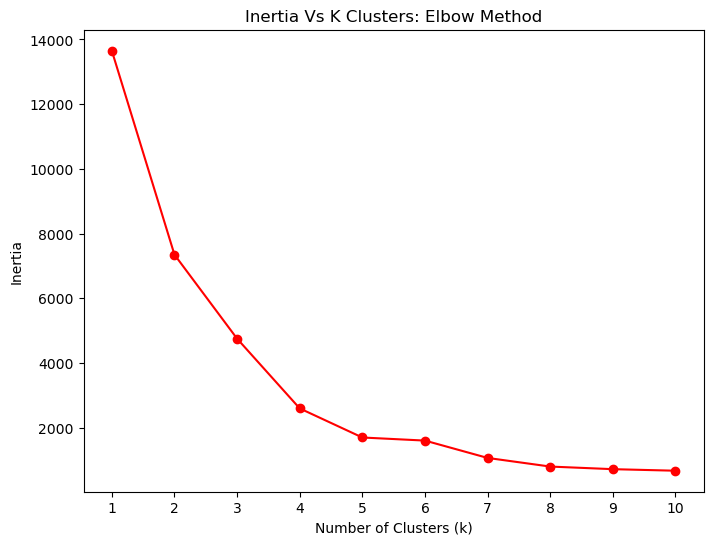

In [55]:
# Plot inertia vs. k (number of clusters)
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_list, marker='o', linestyle='-', color='r')
plt.title("Inertia Vs K Clusters: Elbow Method")
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)  # Ensures all k values are displayed on the x-axis
plt.show()

- According to the above elbow method graph, the optimal number of clusters to use is 4. 

In [60]:
# fitting the final k-Means model using the number of clusters in graph plotted above (4)
# and
# Using model to predict the cluster labels of each data point in the dataset.
kmeans_model1 = KMeans(n_clusters=4, random_state=42).fit(x_scaled)
cluster_labels_pred = kmeans_model1.predict(x_scaled)

In [61]:
# length of clustered labels
len(cluster_labels_pred)

6825

In [62]:
# print clusters
print(cluster_labels_pred)

[2 1 1 ... 0 0 0]


## Model Evaluation
- Use Davies Bouldin Index
- Use Silhouette Coefficient


#### Davies-Bouldin (DB) Index
- An internal evaluation measure based on the ratio of within-cluster to between-cluster separations.
- The smaller the DB value, the better the clustering, as it implies that the clusters are well separated (i.e. the distance -between clusters is large), and the points within each cluster are compact (i.e. they have a small spread).

#### Silhouette Coefficient
- A measure of both cohesion and separation of cluster. The silhouette coefficient varies from –1 to +1.
- A value close to +1 means the data point is much closer to the points in its own cluster. This indicates good clustering.
- A value close to zero means the data point is close to the boundary between two clusters.
- A value close to -1 means the datapoint is much closer to another cluster than its own, and may have been mis-identified

In [63]:
#calculate the Davies Bouldin index and the Silhoutte Coefficient
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
s_score = silhouette_score(x_scaled, cluster_labels_pred)

In [66]:
print('The Davies Bouldin index Score is:', db_score)
print('The Davies Silhouette Score is:', s_score)

The Davies Bouldin index Score is: 0.46301279960458797
The Davies Silhouette Score is: 0.8209257282867866


## Create Cluster plot 

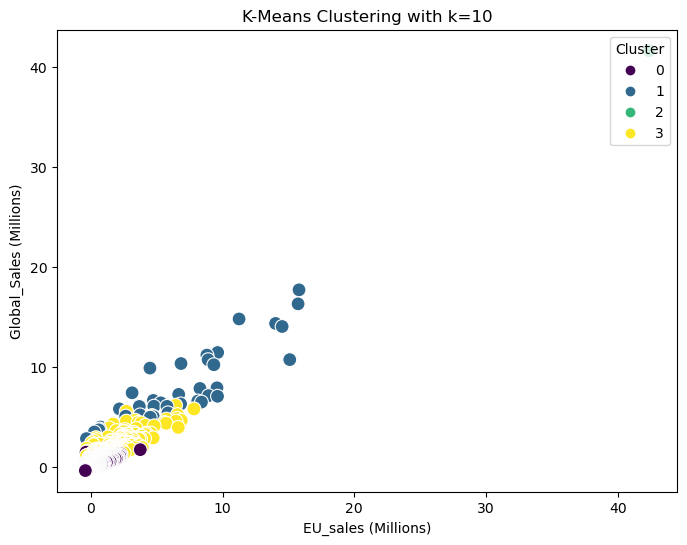

In [75]:
# Create a DataFrame with the data and predicted cluster labels
df = pd.DataFrame(x_scaled, columns=['Global_Sales', 'EU_sales'])  # Assuming 2D data for visualization
df['Cluster'] = cluster_labels_pred

# Create a scatter plot using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='EU_sales', y='Global_Sales', hue='Cluster', palette='viridis', s=100, marker='o', legend='full')

# Set plot title and labels
plt.title(f'K-Means Clustering with k={k}')
plt.xlabel('EU_sales (Millions)')
plt.ylabel('Global_Sales (Millions)')
plt.legend(title='Cluster', loc='upper right')

# Show the plot
plt.show()

## K-Means Clustering Algorithm
### Model 2

### Feature Extraction
- Global Sales and NorthAmerica Sales - Second Combination of numeric input features

In [26]:
# extract the input features that we will be using for this model from the dataset.

features_extracted = ['Global_Sales', 'NA_Sales']
x_feat = clean_df[features_extracted]

In [27]:
# apply standardisation to re- scale numeric input features

scale = StandardScaler() # instantiate a class of standard scaler
scale.fit(x_feat) # fit the numeric input features
x_scaled2 = scale.transform(x_feat) # transform the features


In [28]:
# Train KMeans
kmeans_2 = KMeans(n_clusters=2, random_state=50, verbose=1)
kmeans_2.fit(x_scaled2)
print("Inertia:", kmeans_2.inertia_)

Initialization complete
Iteration 0, inertia 9104.744930334384.
Iteration 1, inertia 8090.611052809376.
Iteration 2, inertia 7817.888975675171.
Iteration 3, inertia 7726.494326883323.
Iteration 4, inertia 7568.213459711846.
Iteration 5, inertia 7464.112302320794.
Iteration 6, inertia 7419.448568164785.
Iteration 7, inertia 7416.09493836145.
Converged at iteration 7: strict convergence.
Inertia: 7416.09493836145


In [46]:
# Elbow Method to find the optimal number of clusters
k_values = range(1,11)
inertia_list2 = []

for k in k_values:
    kmeans_2 = KMeans(n_clusters=k, random_state=50)
    kmeans_2.fit(x_scaled2)
    inertia_list2.append(kmeans_2.inertia_)

inertia_list2

[13650.000000000011,
 7416.09493836145,
 4532.991211993896,
 3086.850326316524,
 1654.7593759186161,
 1146.3665736924202,
 919.8745969796066,
 716.0877093008946,
 601.5372675200854,
 540.2665962100922]

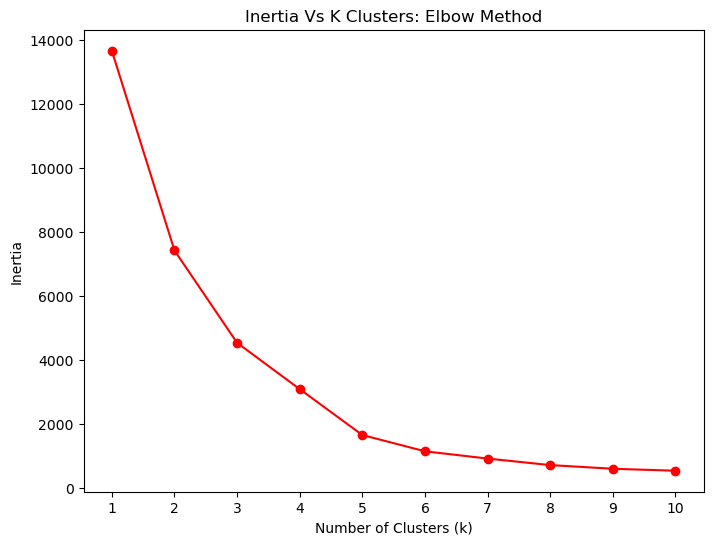

In [47]:
# Plot inertia vs. k
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_list2, marker='o', linestyle='-', color='r')
plt.title("Inertia Vs K Clusters: Elbow Method")
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)  # Ensures all k values are displayed on the x-axis
plt.show()

- According to the above elbow method graph, the optimal number of clusters to use is 3.

In [49]:
# fitting the final k-Means model using the number of clusters in graph plotted above (4)
# and
# Using model to predict the cluster labels of each data point in the dataset.
kmeans_model2 = KMeans(n_clusters=3, random_state=42).fit(x_scaled2)
cluster_labels_pred2 = kmeans_model2.predict(x_scaled2)


In [50]:
# length of clustered lables
len(cluster_labels_pred2)

6825

In [51]:
# examine the cluster labels
print(cluster_labels_pred2)

[2 1 1 ... 0 0 0]


## Model Evaluation 
- Using Internal Measures such as Davies Bouldin Index and Silhouette coefficient


In [52]:
#calculate the Davies Bouldin index and the Silhoutte Coefficient
db_score2 = davies_bouldin_score(x_scaled2, cluster_labels_pred2)
s_score2 = silhouette_score(x_scaled2, cluster_labels_pred2)

In [53]:
print('The Davies Bouldin index Score is:', db_score2)
print('The Davies Silhouette Score is:', s_score2)

The Davies Bouldin index Score is: 0.39158149729141195
The Davies Silhouette Score is: 0.8954424063488101


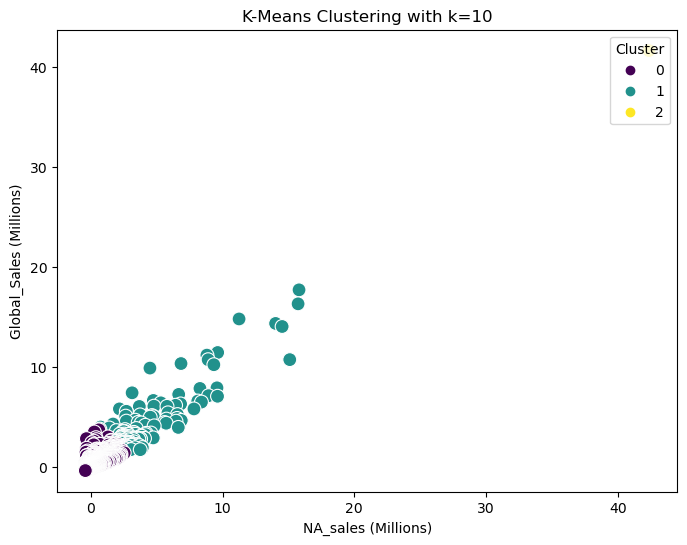

In [54]:
# Create a DataFrame with the data and predicted cluster labels
df = pd.DataFrame(x_scaled2, columns=['Global_Sales', 'NA_sales'])  # Assuming 2D data for visualization
df['Cluster'] = cluster_labels_pred2

# Create a scatter plot using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='NA_sales', y='Global_Sales', hue='Cluster', palette='viridis', s=100, marker='o', legend='full')

# Set plot title and labels
plt.title(f'K-Means Clustering with k={k}')
plt.xlabel('NA_sales (Millions)')
plt.ylabel('Global_Sales (Millions)')
plt.legend(title='Cluster', loc='upper right')

# Show the plot
plt.show()

## Task g. 

- Compare the results of the k-Means clustering model from part (f) to at least one other
clustering algorithm. Which algorithm produces the best clustering? Use suitable
evaluation metrics to justify your answer.

### Hierarchical Clustering - Agglomerative Model 1

#### Feature Extraction
- Global Sales and European Sales
- Global Sales and North America Sales

In [34]:
# extract input features 
agg_features = ["Global_Sales", "EU_Sales"]
x_agg = clean_df[agg_features]

In [35]:
# instantiate standard scaler
scale = StandardScaler()

In [36]:
# instantiate standard scaler
scale = StandardScaler()

# fit and transform the features
scale.fit(x_agg)
x_agg_scaled = scale.transform(x_agg)

# import agglomerative clustering from sklearn library
from sklearn.cluster import AgglomerativeClustering

# instantiate agglomeratic=ve clustering model
agg_model = AgglomerativeClustering(n_clusters = 4, linkage = 'complete') # set linkage as complete

In [39]:
# import agglomerative clustering from sklearn library
from sklearn.cluster import AgglomerativeClustering

# instantiate agglomeratic=ve clustering model
agg_model = AgglomerativeClustering(n_clusters = 4, linkage = 'complete') # set linkage as complete

## Train the Model

In [40]:
# fit agglomerative model to the standardized data 
agg_labels_pred = agg_model.fit_predict(x_agg_scaled)


print(agg_labels_pred) # examine the number of clusters

print(len(agg_labels_pred)) # check the length of the data points in clusters

[3 2 2 ... 0 0 0]
6825


### Evaluate the Model using Davies Bouldin Index and Silhouette Coefficient

In [44]:
# calculate the Davies Bouldin Index by using the scaled data and agglomerative cluster labels as arguments 
db_score = davies_bouldin_score(x_agg_scaled,agg_labels_pred)
# calculate the Silhouette Coefficient by using the scaled data and agglomerative cluster labels as arguments
s_score = silhouette_score(x_agg_scaled, agg_labels_pred)

print('The Davies Bouldin Index is:', db_score)
print('The Silhouette Coefficient is:', s_score)


The Davies Bouldin Index is: 0.450767693320008
The Silhouette Coefficient is: 0.9247641736112651


## Plot the Scatter Plot of Clusters

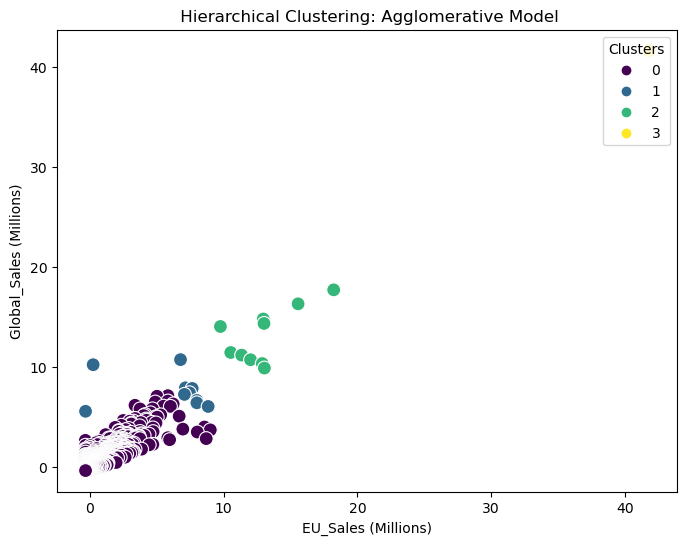

In [45]:
# Create a DataFrame with the data and predicted cluster labels for Agglomerative Model
df_agg = pd.DataFrame(x_agg_scaled, columns=['Global_Sales', 'EU_Sales'])  # Assuming 2D data for visualization
df_agg['Agg_Cluster'] = agg_labels_pred

# Create a scatter plot using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_agg, x='EU_Sales', y='Global_Sales', hue='Agg_Cluster', palette='viridis', s=100, marker='o', legend='full')

# Set plot title and labels
plt.title(' Hierarchical Clustering: Agglomerative Model')
plt.xlabel('EU_Sales (Millions)')
plt.ylabel('Global_Sales (Millions)')
plt.legend(title='Clusters', loc='upper right')

# Show the plot
plt.show()

## Hierarchical Clustering - Agglomerative Model 2
### Feature Extraction
- Global Sales and North America Sales



In [56]:
# extract input features 
agg_features2 = ["Global_Sales", "NA_Sales"]
x_agg2 = clean_df[agg_features2]

In [57]:
# instantiate standard scaler
scale = StandardScaler()

# fit and transform the features
scale.fit(x_agg2)
x_agg_scaled2 = scale.transform(x_agg2)

# import agglomerative clustering from sklearn library
from sklearn.cluster import AgglomerativeClustering

# instantiate agglomeratic=ve clustering model
agg_model2 = AgglomerativeClustering(n_clusters = 3, linkage = 'complete') # set linkage as complete

## Train the Model

In [58]:
# fit agglomerative model to the standardized data 
agg_labels_pred2 = agg_model.fit_predict(x_agg_scaled2)


print(agg_labels_pred2) # examine the number of clusters

print(len(agg_labels_pred2)) # check the length of the data points in clusters

[3 2 2 ... 0 0 0]
6825


## Evaluate the Model
- Davies Bouldin Index
- Silhouette Coefficient

In [59]:
# calculate the Davies Bouldin Index by using the scaled data and agglomerative cluster labels as arguments 
db_score = davies_bouldin_score(x_agg_scaled2,agg_labels_pred2)
# calculate the Silhouette Coefficient by using the scaled data and agglomerative cluster labels as arguments
s_score = silhouette_score(x_agg_scaled2, agg_labels_pred2)

print('The Davies Bouldin Index is:', db_score)
print('The Silhouette Coefficient is:', s_score)


The Davies Bouldin Index is: 0.32614309738799496
The Silhouette Coefficient is: 0.9331335272683968


## Scatter Plot of Clusters

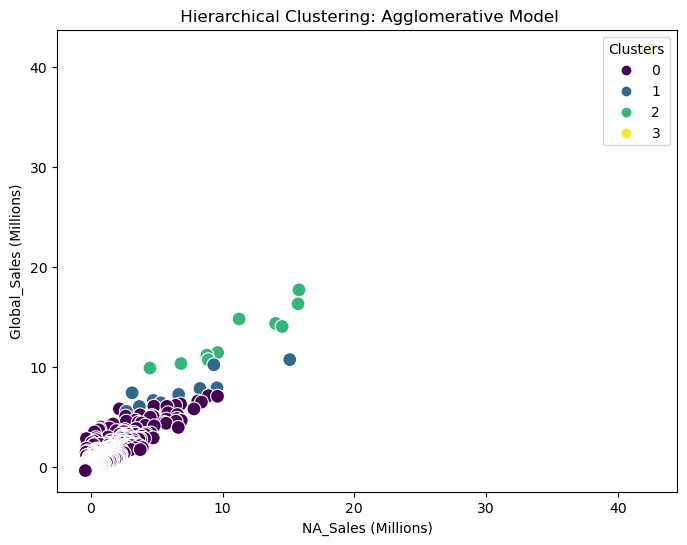

In [61]:
# Create a DataFrame with the data and predicted cluster labels for Agglomerative Model
df_agg2 = pd.DataFrame(x_agg_scaled2, columns=['Global_Sales', 'NA_Sales'])  # Assuming 2D data for visualization
df_agg2['Agg_Cluster'] = agg_labels_pred

# Create a scatter plot using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_agg2, x='NA_Sales', y='Global_Sales', hue='Agg_Cluster', palette='viridis', s=100, marker='o', legend='full')

# Set plot title and labels
plt.title(' Hierarchical Clustering: Agglomerative Model')
plt.xlabel('NA_Sales (Millions)')
plt.ylabel('Global_Sales (Millions)')
plt.legend(title='Clusters', loc='upper right')

# Show the plot
plt.show()

## References
- OpenAI (2024). ChatGPT. Version 4.0. Available at: https://chat.openai.com/ [Accessed 22 November 2024].
- Hannah Igboke (2024). Predicitng Global Sales. Available at: https://www.kaggle.com/code/hannahigboke/game-sales-predicting-global-sales [Accessed 1 Decemeber 2024]
- Praveen (2023) Video Games Sales Analysis EDA. Available at: https://www.kaggle.com/code/praveensaik/video-game-sales-analysis-eda [Accessed 28 November 2024]